# Import and install libraries

## Install PyCaret full version

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.0 MB

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import csv
import re
from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.model_selection import train_test_split
from pycaret.classification import ClassificationExperiment
from pycaret.classification import *
from imblearn.combine import SMOTETomek
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load dataset

In [2]:
df = pd.read_csv(
    filepath_or_buffer='/content/drive/MyDrive/cleared_df.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate'])

# Exploratory Data Analysis (EDA)

## Feature types and descriptive statistics analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6603 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6603 non-null   object        
 4   JobStartDate       6603 non-null   datetime64[ns]
 5   Position           6603 non-null   object        
 6   MonthProfit        6603 non-null   float64       
 7   MonthExpense       6603 non-null   float64       
 8   Gender             6603 non-null   float64       
 9   Family status      6603 non-null   object        
 10  ChildCount         6603 non-null   float64       
 11  SNILS              6603 non-null   float64       
 12  BankA_decision     6603 non-null   object        
 13  BankB_decision     6603 non-null   object        
 14  Ba

Let's summarize feature datatypes:

**object:** Object format means variables are categorical. Categorical variables in our dataset are: education, employment status, Value, Position, Family status, BankN_decision, Goods category

**datetime:** Date variables are BirthDate and JobStartDate

**float64:** It represents numerical variables. Numerical variables in our dataset are: MonthProfit, MonthExpense, Gender, ChildCount, SNILS, Merch_code, Loan_amount, Loan_term

In [ ]:
# "Merch_code" should be a categorical feature so we convert it to Categorical type
df['Merch_code'] = pd.Categorical(df['Merch_code'])

In [ ]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1.0,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000.0,90000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
2.0,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000.0,60000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
3.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
4.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
5.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [ ]:
df.describe()

,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Loan_amount,Loan_term
count,6.603000e+03,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,1.484528e+05,26234.063153,0.307890,0.096774,0.350295,76362.108133,12.117219
std,7.742496e+04,22557.993167,0.461656,0.421901,0.477099,50978.500496,5.996582
min,5.000000e+01,0.000000,0.000000,0.000000,0.000000,4000.000000,6.000000
25%,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,35000.000000,6.000000
50%,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,68000.000000,12.000000
75%,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,101000.000000,18.000000
max,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,200000.000000,24.000000


## Filling NANs

In [ ]:
# Let's have a look if there are empty values in our dataset
df.isna().sum().sum()

0

Our dataset doesn't contain any NAN values, because we load already cleared dataset.
The NAN filler functions are described in the API.
Please refer to the API code to see what techniques are being used for NAN filling.

## Target variable analysis

In [ ]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number
df['BankA_decision'].value_counts(normalize=True)

success    0.752688
denied     0.236559
error      0.010753
Name: BankA_decision, dtype: float64

<Axes: >

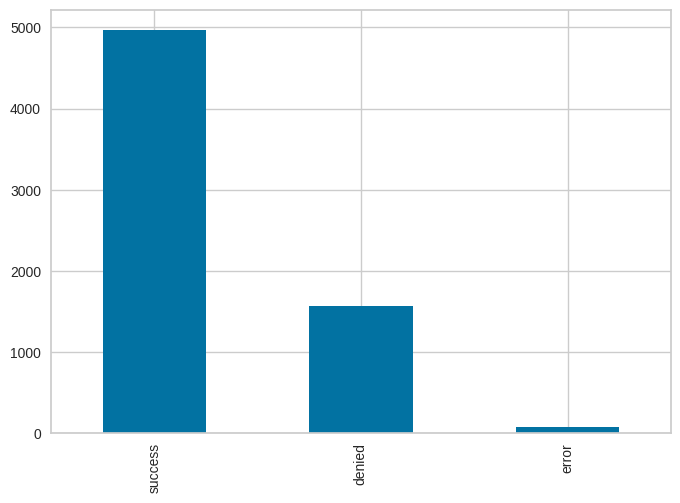

In [ ]:
# bar plot to visualize the frequency
df['BankA_decision'].value_counts().plot.bar()

In [ ]:
# The loan of 75% of people was approved and 24% were denied. It seems that classes are imbalanced, thus accuracy as an evaluation metric should not be appropriate.
# We might need to use AOC and F1 score as evaluation metrics.

## Categorical data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6603 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6603 non-null   object        
 4   JobStartDate       6603 non-null   datetime64[ns]
 5   Position           6603 non-null   object        
 6   MonthProfit        6603 non-null   float64       
 7   MonthExpense       6603 non-null   float64       
 8   Gender             6603 non-null   float64       
 9   Family status      6603 non-null   object        
 10  ChildCount         6603 non-null   float64       
 11  SNILS              6603 non-null   float64       
 12  BankA_decision     6603 non-null   object        
 13  BankB_decision     6603 non-null   object        
 14  Ba

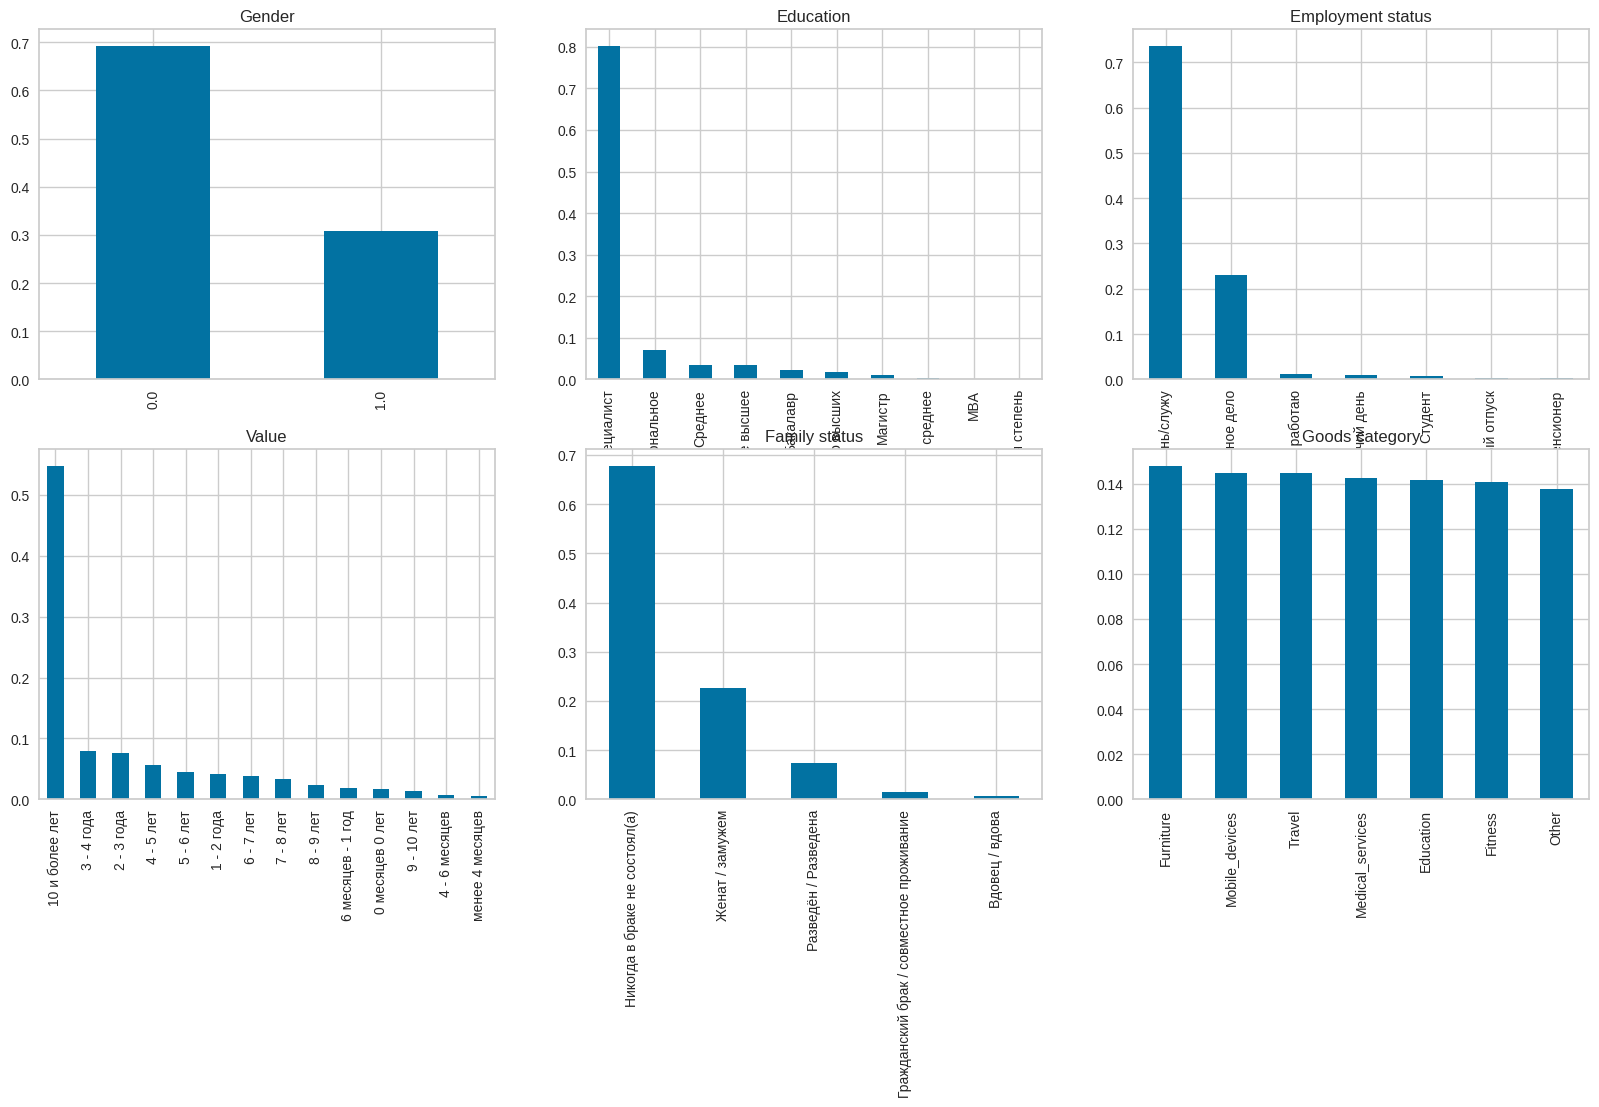

In [ ]:
# Visualizing categorical features

plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(233)
df['employment status'].value_counts(normalize=True).plot.bar(title= 'Employment status')

plt.subplot(234)
df['Value'].value_counts(normalize=True).plot.bar(title= 'Value')

#plt.subplot(235)
#df['Position'].value_counts(normalize=True).plot.bar(title= 'Position')

plt.subplot(235)
df['Family status'].value_counts(normalize=True).plot.bar(title= 'Family status')

plt.subplot(236)
df['Goods_category'].value_counts(normalize=True).plot.bar(title= 'Goods category')
plt.show()

In [ ]:
'''
It can be inferred from the above bar plots that:

70% applicants in the dataset are male.
Around 80% of the applicants are Graduate.
Around 55% have working experience more than 10 years.
Around 66% of the applicants have never been married.
Around 75% applicants in the dataset work on full-day job.
Goods categories for which loans have been applied are distributed equally.

'''

'\nIt can be inferred from the above bar plots that:\n\n70% applicants in the dataset are male.\nAround 80% of the applicants are Graduate.\nAround 55% have working experience more than 10 years.\nAround 66% of the applicants have never been married.\nAround 75% applicants in the dataset work on full-day job.\nGoods categories for which loans have been applied are distributed equally.\n\n'

## Numerical features

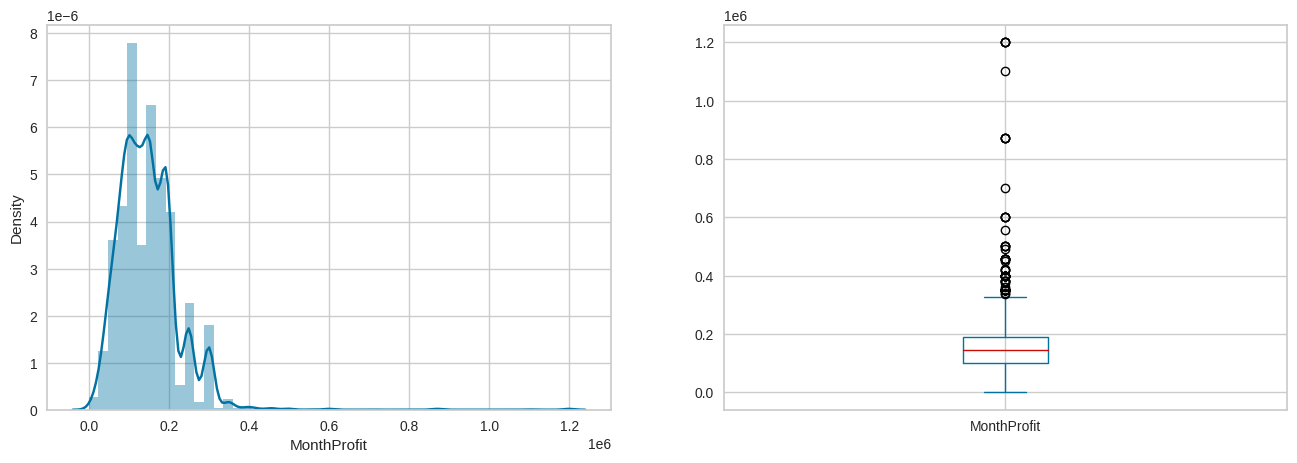

In [ ]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(df['MonthProfit']);

plt.subplot(122)
df['MonthProfit'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# We see a fairly normal distribution (slightly right-skewed, positive skewness).
# which means it is not normally distributed. The distribution is right-skewed (positive skewness).
# We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

# The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.
# Part of this can be driven by the fact that we are looking at people with different education levels.
# Let us segregate them by Education:

Text(0.5, 0.98, '')

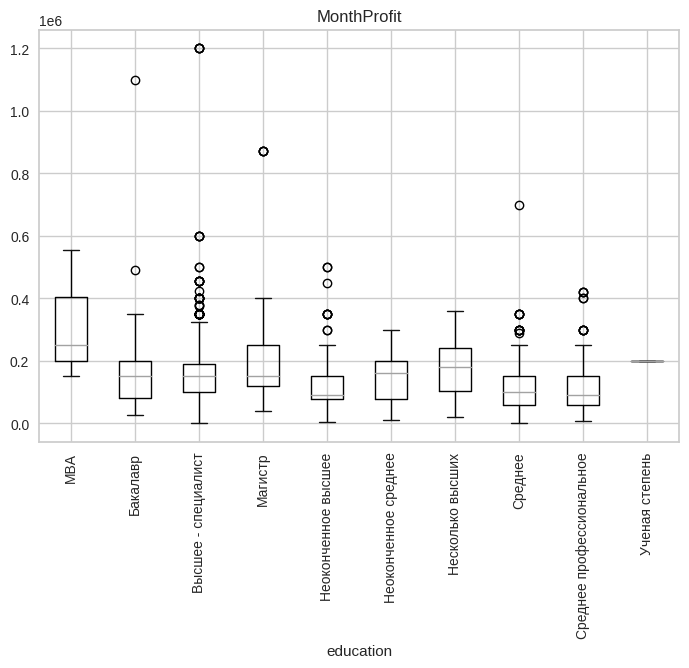

In [ ]:
df.boxplot(column='MonthProfit', by = 'education')
plt.xticks(rotation=90)
plt.suptitle("")

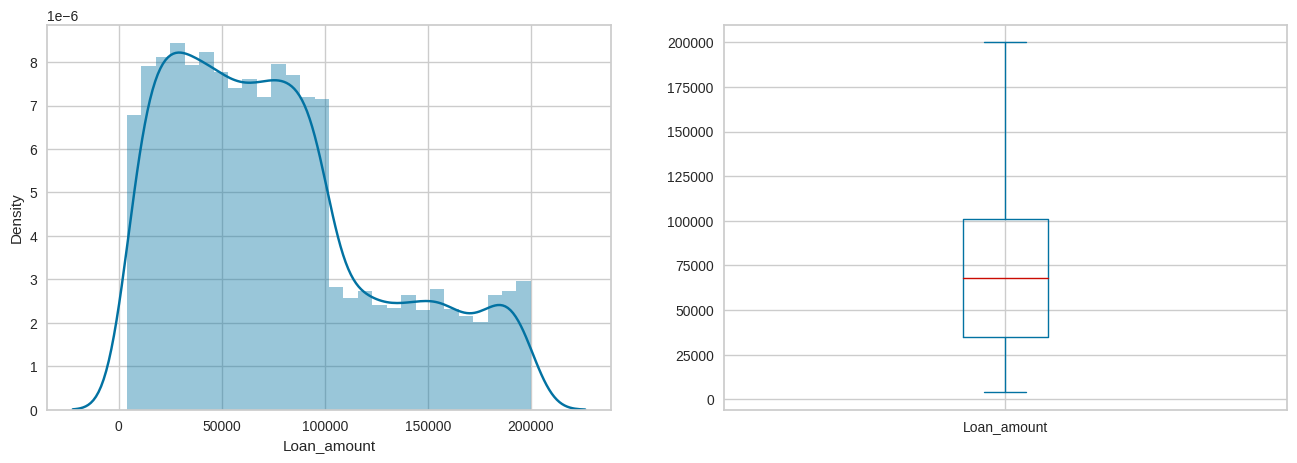

In [ ]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(df['Loan_amount']);

plt.subplot(122)
df['Loan_amount'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount and there are no outliers in this variable.

In [ ]:
#Lastly, let’s look at the distribution of Loan_term variable. Since Loan_term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [ ]:
# frequency table of a variable will give us the count of each category in that variable
df['Loan_term'].value_counts()

12.0    2490
6.0     2406
18.0     879
24.0     828
Name: Loan_term, dtype: int64

<Axes: title={'center': 'Loan_term'}>

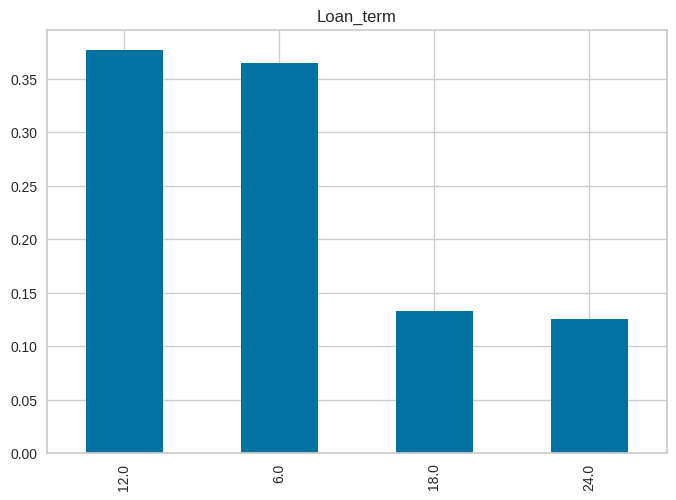

In [ ]:
# plot bar chart
df['Loan_term'].value_counts(normalize=True).plot.bar(title= 'Loan_term')

In [ ]:
#It can be inferred from the above bar plot that:

# Around 40% of the loans are 12 months term or 1 year period.
# Around 35% of the loans are 6 months term or half year period.

## Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis.

### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

BankA_decision  denied  error  success
Gender                                
0.0               1100     55     3415
1.0                462     16     1555


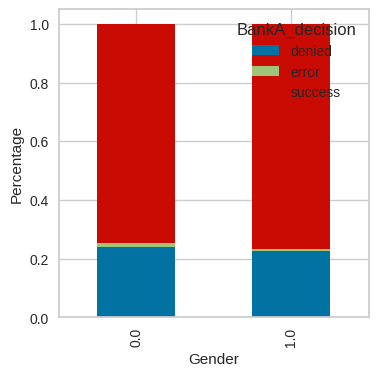

In [ ]:
print(pd.crosstab(df['Gender'],df['BankA_decision']))

Gender = pd.crosstab(df['Gender'],df['BankA_decision'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

BankA_decision                            denied  error  success
Family status                                                   
Вдовец / вдова                                10      0       39
Гражданский брак / совместное проживание      18      1       85
Женат / замужем                              359     25     1106
Никогда в браке не состоял(а)               1059     41     3374
Разведён / Разведена                         116      4      366


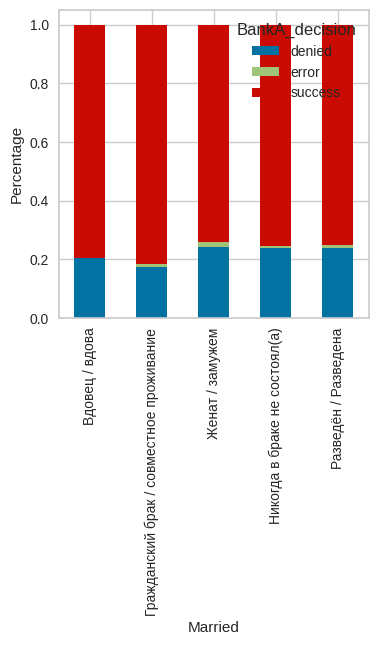

In [ ]:
print(pd.crosstab(df['Family status'],df['BankA_decision']))

Married = pd.crosstab(df['Family status'],df['BankA_decision'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

BankA_decision            denied  error  success
education                                       
MBA                            1      0        2
Бакалавр                      30      2      121
Высшее - специалист         1259     55     3982
Магистр                       22      1       50
Неоконченное высшее           46      2      185
Неоконченное среднее           5      1       24
Несколько высших              30      0       80
Среднее                       41      2      190
Среднее профессиональное     128      8      335
Ученая степень                 0      0        1


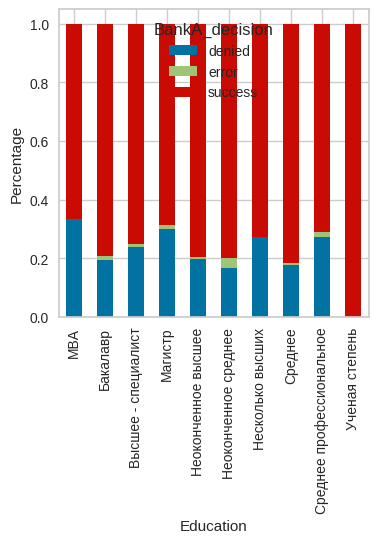

In [ ]:
print(pd.crosstab(df['education'],df['BankA_decision']))

Education=pd.crosstab(df['education'],df['BankA_decision'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

BankA_decision                              denied  error  success
employment status                                                 
Декретный отпуск                                 6      0       13
Не работаю                                      18      1       56
Пенсионер                                        5      0       13
Работаю по найму неполный рабочий день          13      0       49
Работаю по найму полный рабочий день/служу    1130     53     3675
Собственное дело                               385     17     1125
Студент                                          5      0       39


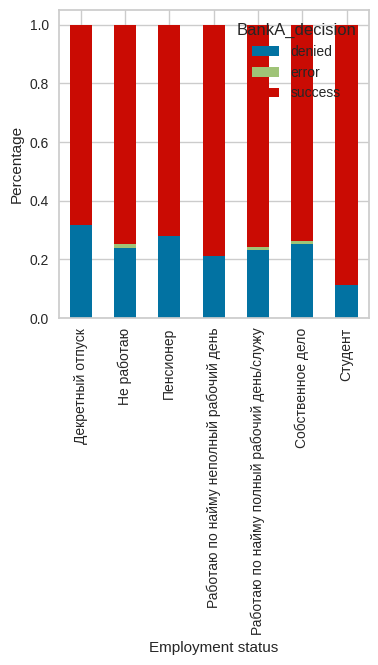

In [ ]:
print(pd.crosstab(df['employment status'],df['BankA_decision']))

Employment=pd.crosstab(df['employment status'],df['BankA_decision'])
Employment.div(Employment.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Employment status')
p = plt.ylabel('Percentage')

BankA_decision     denied  error  success
Value                                    
0 месяцев 0 лет        22      1       86
1 - 2 года             70      4      198
10 и более лет        865     32     2716
2 - 3 года             99      7      393
3 - 4 года            129      7      390
4 - 5 лет              87      6      277
4 - 6 месяцев          14      0       39
5 - 6 лет              80      4      209
6 - 7 лет              52      4      194
6 месяцев - 1 год      23      1       97
7 - 8 лет              64      2      159
8 - 9 лет              34      2      116
9 - 10 лет             13      1       74
менее 4 месяцев        10      0       22


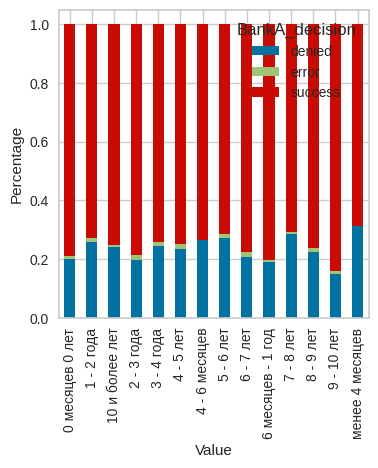

In [ ]:
print(pd.crosstab(df['Value'],df['BankA_decision']))

value=pd.crosstab(df['Value'],df['BankA_decision'])
value.div(value.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Value')
p = plt.ylabel('Percentage')

BankA_decision    denied  error  success
Goods_category                          
Education            218     10      708
Fitness              227      7      694
Furniture            243     14      719
Medical_services     215     10      715
Mobile_devices       206     15      736
Other                208      7      695
Travel               245      8      703


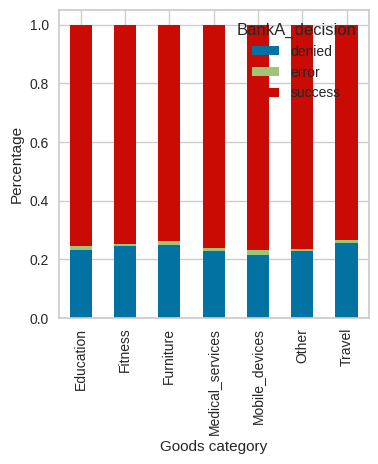

In [ ]:
print(pd.crosstab(df['Goods_category'],df['BankA_decision']))

gc=pd.crosstab(df['Goods_category'],df['BankA_decision'])
gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Goods category')
p = plt.ylabel('Percentage')

In [ ]:
'''
From the bar charts above, it can be inferred that:

proportion of male and female applicants is more or less same for both approved and unapproved loans
proportion of not married but co-living applicants is higher for the approved loans
proportion of loans getting approved for graduates is not higher compared to non-graduates
it seems people with 10+ years of working experience are more likely to get their loans approved
proportion of distribution between goods categories seems to be balanced.
Now let’s visualize numerical independent variables with respect to target variable.
'''

'\nFrom the bar charts above, it can be inferred that:\n\nproportion of male and female applicants is more or less same for both approved and unapproved loans\nproportion of not married but co-living applicants is higher for the approved loans\nproportion of loans getting approved for graduates is not higher compared to non-graduates\nit seems people with 10+ years of working experience are more likely to get their loans approved\nproportion of distribution between goods categories seems to be balanced.\nNow let’s visualize numerical independent variables with respect to target variable.\n'

### Numerical Independent Variable vs Target Variable

 We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.**bold text**

BankA_decision
denied     147334.655570
error      148576.760563
success    148802.415694
Name: MonthProfit, dtype: float64


<Axes: xlabel='BankA_decision'>

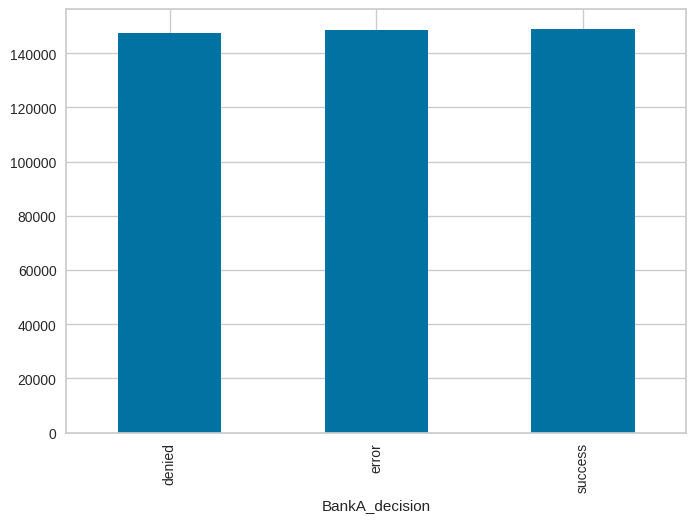

In [ ]:
print(df.groupby('BankA_decision')['MonthProfit'].mean())

df.groupby('BankA_decision')['MonthProfit'].mean().plot.bar()

In [ ]:
#Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicants.

BankA_decision  denied  error  success
Income_bin                            
Low                 30      3      157
Average            258     12      712
High               378     16     1168
Very high          340     16     1170


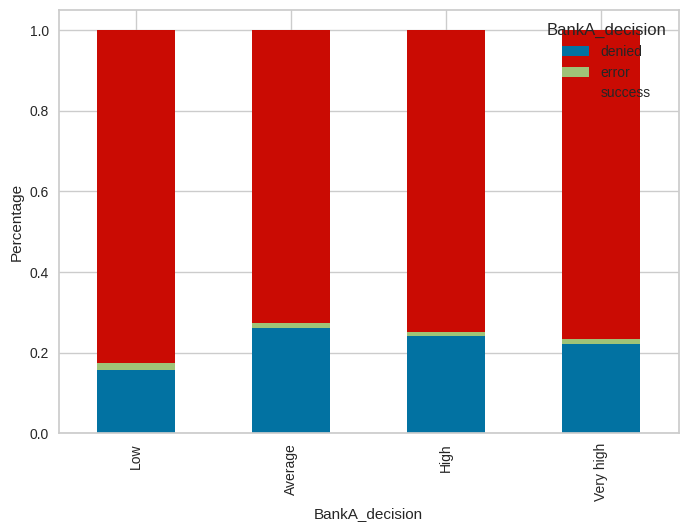

In [ ]:
# making bins for applicant income variable
bins = [0,40000, 80000, 120000, 160000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['MonthProfit'],bins,labels=group)

print(pd.crosstab(df['Income_bin'],df['BankA_decision']))

Income_bin = pd.crosstab(df['Income_bin'],df['BankA_decision'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('BankA_decision')
P = plt.ylabel('Percentage')

In [ ]:
df.drop(['Income_bin'], inplace=True, axis=1)

In [ ]:
# It can be inferred that Applicant income does not affect the chances of loan approval
# which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

BankA_decision
denied     121030.565941
error      124880.323944
success    122554.109054
Name: Free_money, dtype: float64


<Axes: xlabel='BankA_decision'>

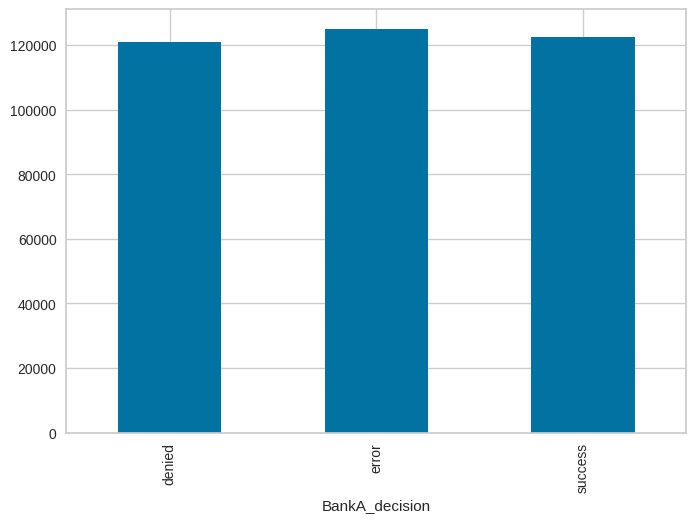

In [ ]:
df['Free_money'] = df['MonthProfit'] - df['MonthExpense']
print(df.groupby('BankA_decision')['Free_money'].mean())

df.groupby('BankA_decision')['Free_money'].mean().plot.bar()

BankA_decision
denied     5788.812420
error      5945.422535
success    5823.312095
Name: EMI, dtype: float64


<Axes: xlabel='BankA_decision'>

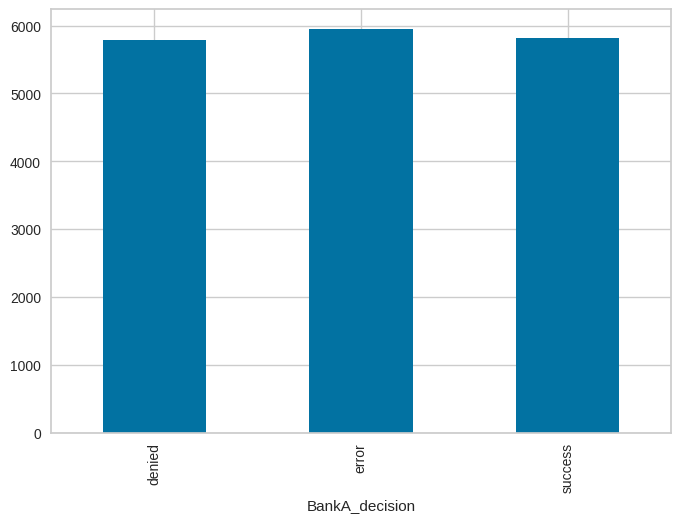

In [ ]:
df['EMI'] = df['Loan_amount']/df['Loan_term']
print(df.groupby('BankA_decision')['EMI'].mean())

df.groupby('BankA_decision')['EMI'].mean().plot.bar()

BankA_decision
denied     115241.753521
error      118934.901408
success    116730.796960
Name: Free_money_EMI_diff, dtype: float64


<Axes: xlabel='BankA_decision'>

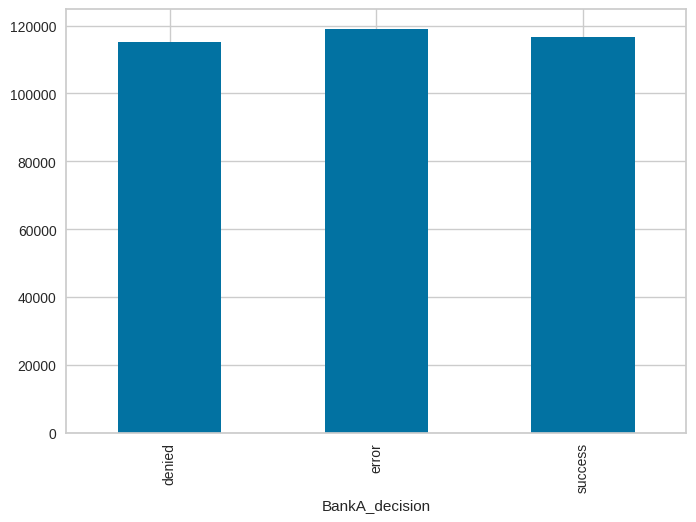

In [ ]:
df['Free_money_EMI_diff'] = df['Free_money']-df['EMI']
print(df.groupby('BankA_decision')['Free_money_EMI_diff'].mean())

df.groupby('BankA_decision')['Free_money_EMI_diff'].mean().plot.bar()

In [ ]:
 df = df.drop(['EMI', 'Free_money', 'Free_money_EMI_diff'], axis = 1)

BankA_decision  denied  error  success
Loan_term_cat                         
6.0                556     25     1825
12.0               609     31     1850
18.0               207      9      663
24.0               190      6      632


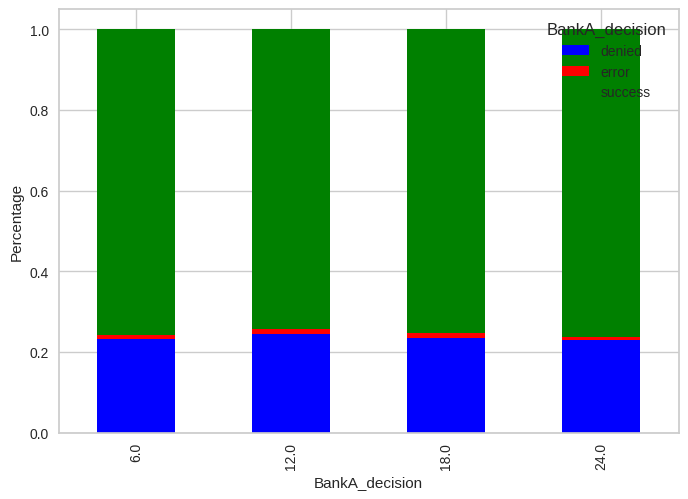

In [ ]:
# making bins for applicant income variable
df['Loan_term'].unique
# We have credits for 6,12,18 and 24 months

df['Loan_term_cat'] = pd.Categorical(df['Loan_term'])

print(pd.crosstab(df['Loan_term_cat'],df['BankA_decision']))

Income_bin = pd.crosstab(df['Loan_term_cat'],df['BankA_decision'])
color = ['blue', 'red', 'green']
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=color)
plt.xlabel('BankA_decision')
P = plt.ylabel('Percentage')

In [ ]:
# Loan term doesn't affect bank decision on loan approval

In [ ]:
df.drop(['Loan_term_cat'], inplace=True, axis=1)

In [ ]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['BankA_decision'].replace('denied', 0, inplace=True)
df['BankA_decision'].replace('success', 1, inplace=True)
df['BankA_decision'].replace('error', -1, inplace=True)

,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,BankA_decision,Loan_amount,Loan_term
MonthProfit,1.000000,0.383227,0.005056,-0.135435,-0.046841,0.007329,0.007741,0.003550
MonthExpense,0.383227,1.000000,0.010219,0.079605,0.137536,0.003651,-0.006435,-0.011478
Gender,0.005056,0.010219,1.000000,0.008755,0.014338,0.021786,0.001872,-0.000892
ChildCount,-0.135435,0.079605,0.008755,1.000000,0.154383,0.010815,-0.000806,0.003418
SNILS,-0.046841,0.137536,0.014338,0.154383,1.000000,0.016443,-0.012278,-0.014354
BankA_decision,0.007329,0.003651,0.021786,0.010815,0.016443,1.000000,0.006966,0.003379
Loan_amount,0.007741,-0.006435,0.001872,-0.000806,-0.012278,0.006966,1.000000,0.961031
Loan_term,0.003550,-0.011478,-0.000892,0.003418,-0.014354,0.003379,0.961031,1.000000


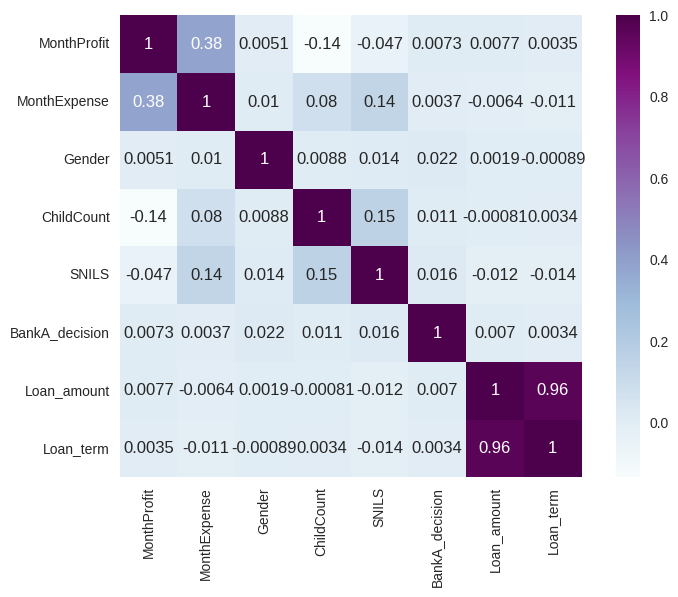

In [ ]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [ ]:
# As we can see correlation with target variable for existing features leaves much to be desired, so we will begin try to add some new useful features.

# Feature Engineering

## "Position" feature creator

First as we may notice "Position" column contains many different spellings for the same profession. We have created a csv file "patterns.csv" containing regular expressions, that will be used by our function to “normalize” the same
professions.

In [3]:
def position_feature_creator(position):
    '''
    Calculates "Position" column value based on regular expression patterns
    from patterns.csv. If the position doesn't match any pattern sets it to a
    default value.
    '''
    newPosition = "прочие"
    position = position.lower().strip()

    with open('patterns.csv') as f:
      next(f)  # Skip the header
      reader = csv.reader(f, skipinitialspace=True, delimiter=';')
      patterns = dict(reader)

    for pattern in patterns:
      regex = re.compile(pattern)
      if regex.match(position):
        newPosition = patterns[pattern]

    return newPosition

In [4]:
df.Position = df.Position.apply(position_feature_creator)

BankA_decision                             denied  error  success
Position                                                         
hr менеджер                                     1      0        3
pr менеджер                                     1      1        2
smm специалист                                  1      0       12
агент по недвижимости                           3      0       12
администратор                                  46      0      153
...                                           ...    ...      ...
экономист                                       3      1       10
экспедитор                                      2      0        1
эксперт                                         2      1       10
электрик/электрогазосварщик/электромонтер      16      1       43
юрист                                          12      0       32

[127 rows x 3 columns]


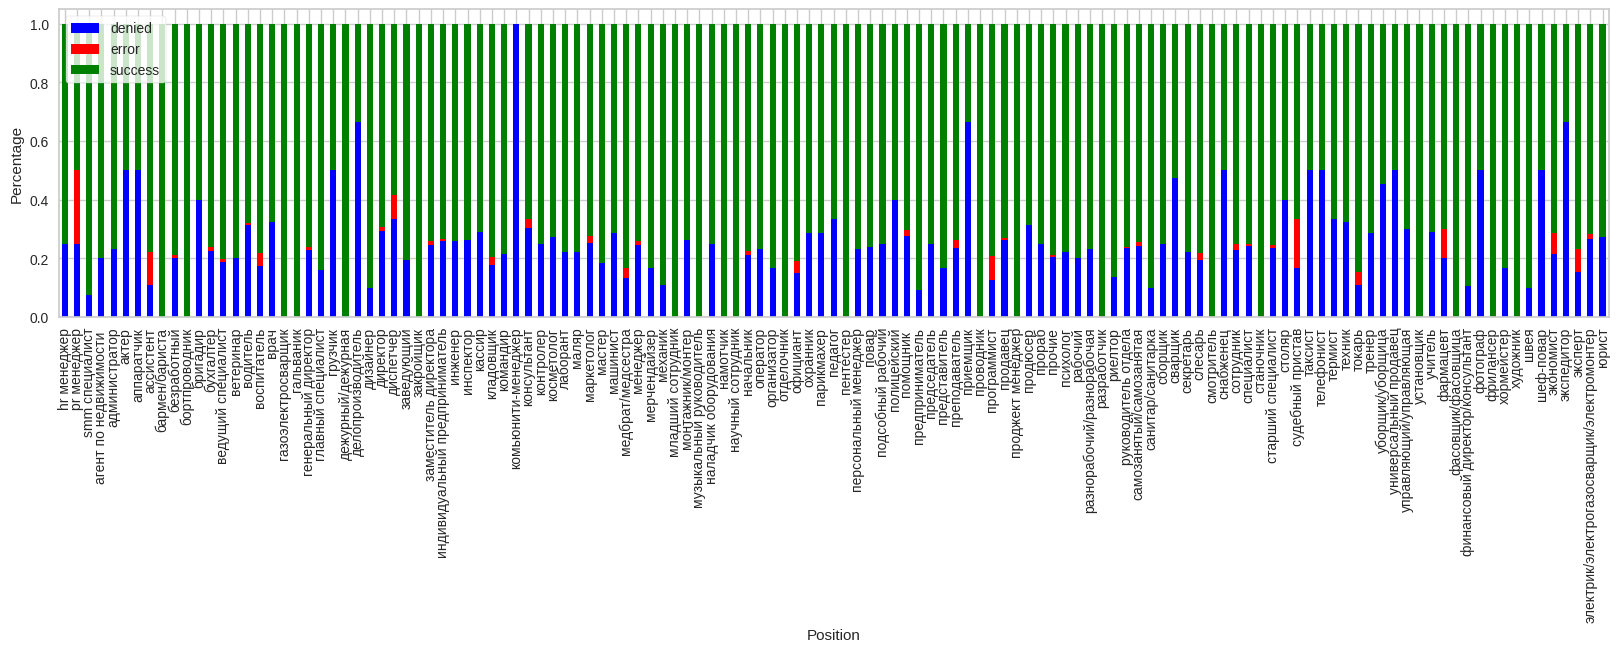

In [5]:
print(pd.crosstab(df['Position'],df['BankA_decision']))
color = ['blue', 'red', 'green']
gc=pd.crosstab(df['Position'],df['BankA_decision'])
ax =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color=color)
plt.xlabel('Position')
p = plt.ylabel('Percentage')
ax.legend(loc='upper left', frameon=True)

Here we can notice that the highest percentage of refusals are recived for
professions associated with a high risk of work-related injuries or accidents. Thus we can conclude that it is useful
to create a feature that will determine the degree of professional risk,
which we will do later.

## "Professional risk" feature creator

Similar to "Position" feature we have created a csv file "risks.csv", that
contains mappingof professions and their professional risks. If the profession
is not in the list we set the risk to a default medium level.

In [6]:
def professional_risk_feature_creator(position):
    '''
    Calculates "Professional risk" column value based on risks.csv values.
    If position is not found sets risk by default to medium level=1.
    Risk levels:
    0 - Low
    1 - Medium
    2 - High
    '''
    risk = "1"
    position = position.lower().strip()

    with open('risks.csv') as f:
      next(f)  # Skip the header
      reader = csv.reader(f, skipinitialspace=True, delimiter=';')
      risks = dict(reader)

    for pr in risks:
      pr = pr.lower().strip()
      if position == pr and (pr in risks):
        risk = risks[pr]

    return risk.strip()

In [7]:
df['ProfRisk'] = df.Position.apply(professional_risk_feature_creator)

BankA_decision  denied  error  success
ProfRisk                              
0                 1258     57     3961
1                  220     12      811
2                   84      2      198


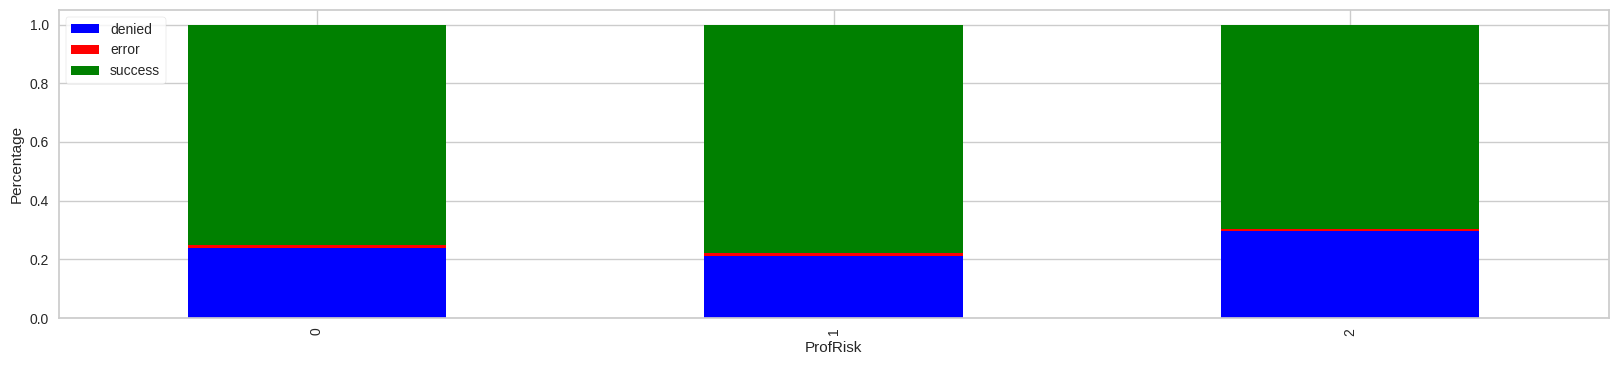

In [8]:
print(pd.crosstab(df['ProfRisk'],df['BankA_decision']))

gc=pd.crosstab(df['ProfRisk'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('ProfRisk')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

We see that professions with high risk (2) have more refusals than other risk levels.

## "Self-employed" feature creator

It is more difficult for the self-employed to prove the stability of their income, so the requirements for them to obtain a loan are stricter and they are more likely to receive refusals. Let's create "SelfEmployed" feature based on "Position" feature.

In [9]:
def self_employed_feature_creator(position):
    """
    Calculates "SelfEmployed" column value.
    Sets value to 1 if position contains "самоз" substring.
    """
    selfEmployed = 0
    position = position.lower().strip()

    if "самоз" in position:
        selfEmployed = 1

    return selfEmployed

In [10]:
df['SelfEmployed'] = df.Position.apply(self_employed_feature_creator)

BankA_decision  denied  error  success
SelfEmployed                          
0                 1436     63     4584
1                  126      8      386


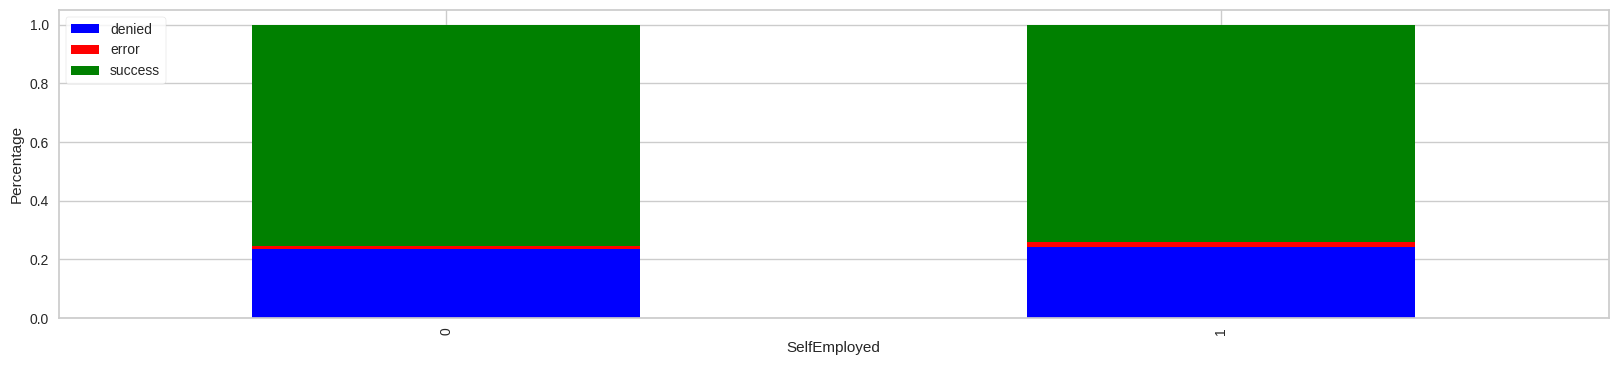

In [11]:
print(pd.crosstab(df['SelfEmployed'],df['BankA_decision']))

gc=pd.crosstab(df['SelfEmployed'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('SelfEmployed')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

As we can see, the refusal rate for the self-employed, although insignificantly, is still higher than for those who do not work for themselves.

## "Working experience on last job position" feature creator

The longer a person works at his last job, the more stable his position is, and therefore the higher his creditworthiness. We can calculate this feature as the difference between the current date and the start date of work on the last job.

In [12]:
def years_on_current_job_feature_creator(row):
  """
  Calculates how long the applicant is working on the current job position
  as a differnece in years of cuurent date and "JobStartDate" value.
  """
  employment_status_ignored = ['Пенсионер', 'Студент',
       'Декретный отпуск', 'Не работаю']

  years_working_on_current_job = 0

  if not row["employment status"] in employment_status_ignored:
    end_date = datetime.now()
    start_date = row["JobStartDate"]
    years_working_on_current_job  = relativedelta(end_date, start_date).years

  if years_working_on_current_job in range(0,3):
    return '0-3 года'
  elif years_working_on_current_job in range(3,6):
    return '3-6 лет'
  elif years_working_on_current_job in range(6,10):
    return '6-10 лет'
  elif years_working_on_current_job in range(10,100):
    return 'больше 10 лет'

In [13]:
df['YearsWorkedOnCurrentJob'] = df.apply(years_on_current_job_feature_creator, axis=1)

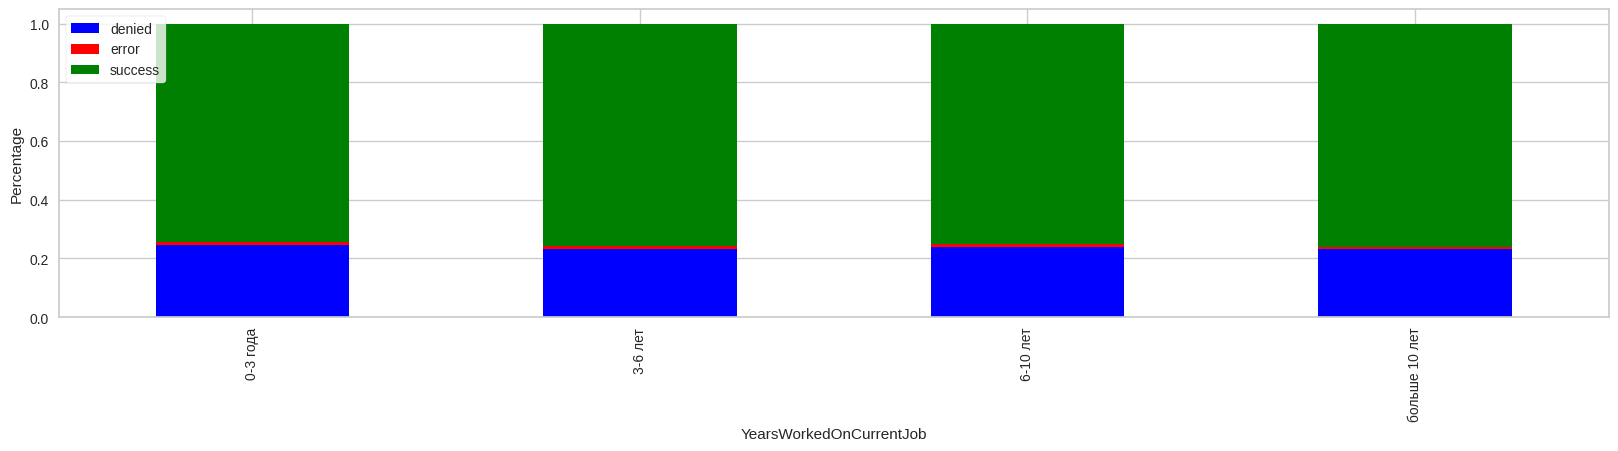

In [14]:
gc=pd.crosstab(df['YearsWorkedOnCurrentJob'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('YearsWorkedOnCurrentJob')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

Видим, что у сотрудников с большим стажем работы на последнем месте в среднем чуть меньше отказов, чем у тех у кого он ниже.

## "Age group" feature creator


Logically, the age of an employee should influence the percentage of refusals. Let’s test this hypothesis by creating “Age” feature based on the date of birth.

In [15]:
def age_feature_creator(row):
  """
  Calculates applicant age based on birth date.
  """
  end_date = datetime.now()
  start_date = row["BirthDate"]
  age  = relativedelta(end_date, start_date).years

  return age

In [16]:
df["Age"] = df.apply(age_feature_creator, axis=1)

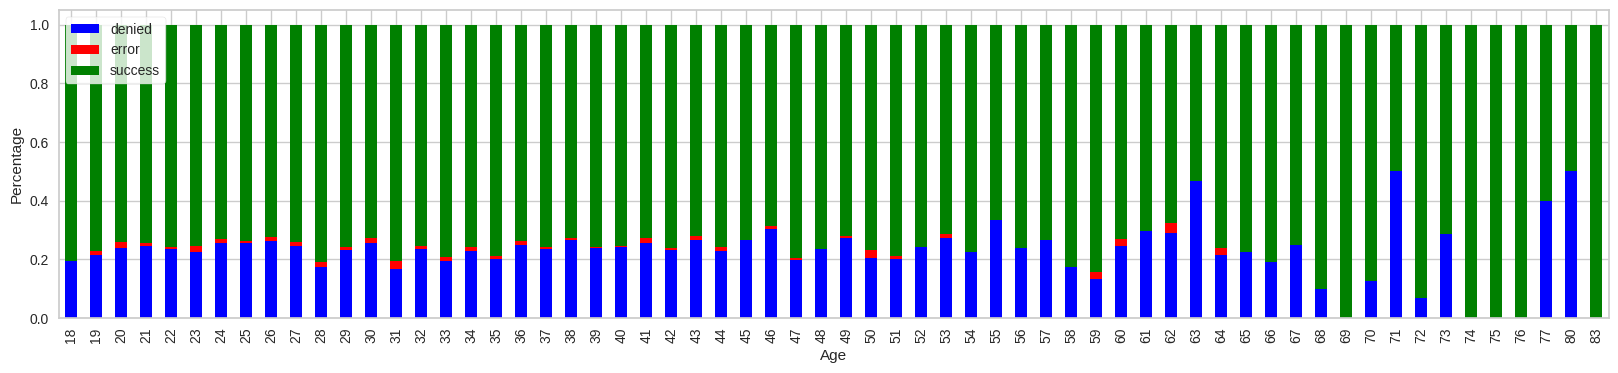

In [17]:
gc=pd.crosstab(df['Age'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('Age')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

The plot turned out to be not very indicative. Let's try to arrange age into age groups.
After some research, we come to the following breakdown:
1. 0-18 - In fact, banks do not have the right to approve a loan under for applicants that haven't reached 18 years.
2. 18-21 - Before age 21, the likelihood of approval should not be very high.
3. 21-25 - At this age, the likelihood of approval is still not very high.
4. 25-45 - Working age, so the likelihood of approval should be maximum.
5. 45-55 - Probably, here it should be a little lower than in the previous group.
6. 55-75 - Retirement age, so the probability here should be even lower than in the previous group.
7. 75-85 - But for this group, according to information from the Internet, there are some benefits, so here we expect a good probability of approval.
8. 85-130 - Well, here, of course, there will probably be the lowest percentage of approval.

In [18]:
# Let's create function for "AgeGroup" feature

def age_group_feature_creator(row):
  """
  Calculates applicant age group.
  """
  end_date = datetime.now()
  start_date = row["BirthDate"]
  age  = relativedelta(end_date, start_date).years

  if age in range(0,18):
    return '0-18'
  elif age in range(18,21):
    return '18-21'
  elif age in range(21,25):
    return '21-25'
  elif age in range(25,45):
    return '25-45'
  elif age in range(45,55):
    return '45-55'
  elif age in range(55,75):
    return '55-75'
  elif age in range(75,85):
    return '75-85'
  elif age in range(85,130):
    return '85+'

In [19]:
df["AgeGroup"] = df.apply(age_group_feature_creator, axis=1)

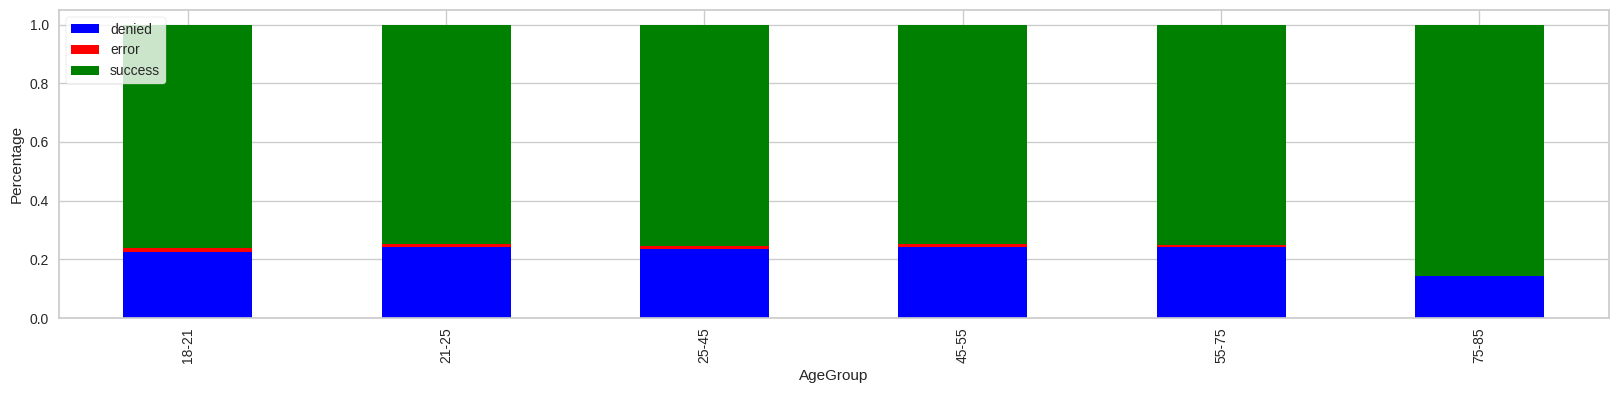

In [20]:
gc=pd.crosstab(df['AgeGroup'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('AgeGroup')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

Well, in general, some of our hypotheses have been confirmed, for example, that 45+ groups have a slightly higher probability of getting a refusal, but the 75-85 group has some priviliges.

In [21]:
# Drop the "Age" feature as we don't need it anymore

In [22]:
df.drop(['Age'], inplace=True, axis=1)

## "Equated Monthly Installment(EMI)" feature creator

Another very useful feature can be "Equated monthly installment(EMI)", or to put it in plain language, a monthly loan payment.

In [23]:
def EMI_feature_creator(row):
  """
  Calculates Equated Monthly Installment(EMI).
  """
  return round(row['Loan_amount']/row['Loan_term'],2)

In [24]:
df['EMI'] = df.apply(EMI_feature_creator, axis = 1)

In [25]:
# making bins for applicant income variable
bins = [0,999, 4999, 9999, 19999, 29999, 39999, 49999, 1000000]
group = ['0-1K','1-5K','5-10K','10-20K','20-30K', '30-40K', '40-50K', '50K+']
df['EMI_range'] = pd.cut(df['EMI'],bins,labels=group)

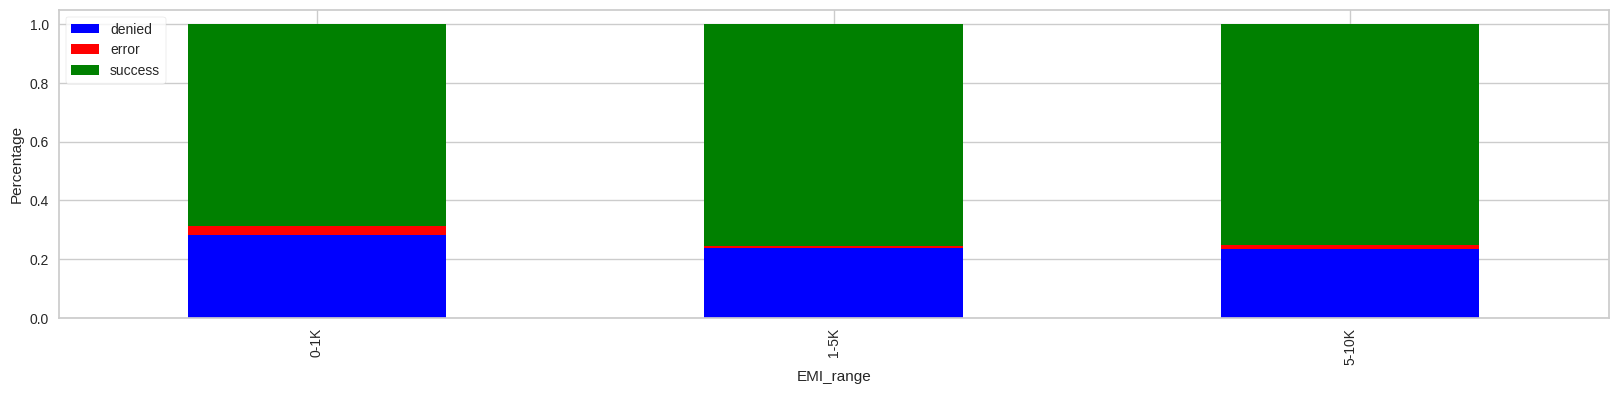

In [26]:
gc=pd.crosstab(df['EMI_range'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('EMI_range')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

There is an inverse relationship with target variable here. The lower the monthly payment, the greater the likelihood of getting refused.

In [27]:
df.drop(['EMI_range'], inplace=True, axis=1)

## "Income balance" feature creator

Income balance is the net of receipts/credits and payments/debits.

In [28]:
def BalanceIncome_feature_creator(row):
  """
  Calculates the balance of the monthly salary after deducting expenses
  and the monthly loan payment (EMI).
  """
  return round(row['MonthProfit'] - row['MonthExpense'] - row['EMI'],2)

In [29]:
df['BalanceIncome'] = df.apply(BalanceIncome_feature_creator, axis = 1)

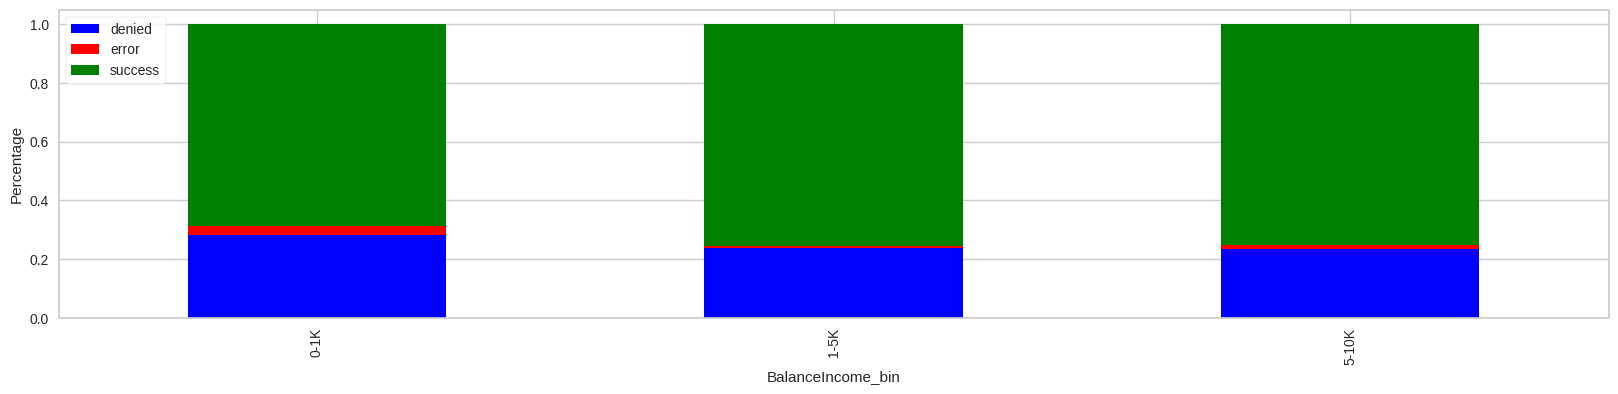

In [30]:
df['BalanceIncome_bin'] = pd.cut(df['EMI'],bins,labels=group)
gc=pd.crosstab(df['BalanceIncome_bin'],df['BankA_decision'])
color = ['blue', 'red', 'green']
ax2 =gc.div(gc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,4), color= color)
plt.xlabel('BalanceIncome_bin')
p = plt.ylabel('Percentage')
ax2.legend(loc='upper left', frameon=True)

From the plot we see that applicants with lower "Income balance" have less chance to get an approval.

In [31]:
df.drop(['BalanceIncome_bin'], inplace=True, axis=1)

## Feature correlation map

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6603 entries, 1.0 to 8787.0
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BirthDate                6603 non-null   datetime64[ns]
 1   education                6603 non-null   object        
 2   employment status        6603 non-null   object        
 3   Value                    6603 non-null   object        
 4   JobStartDate             6603 non-null   datetime64[ns]
 5   Position                 6603 non-null   object        
 6   MonthProfit              6603 non-null   float64       
 7   MonthExpense             6603 non-null   float64       
 8   Gender                   6603 non-null   float64       
 9   Family status            6603 non-null   object        
 10  ChildCount               6603 non-null   float64       
 11  SNILS                    6603 non-null   float64       
 12  BankA_decision           660

,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term,SelfEmployed,EMI,BalanceIncome
MonthProfit,1.000000,0.383227,0.005056,-0.135435,-0.046841,-0.000929,0.007741,0.003550,-0.030997,0.013332,0.956754
MonthExpense,0.383227,1.000000,0.010219,0.079605,0.137536,-0.001799,-0.006435,-0.011478,-0.051565,-0.001625,0.099027
Gender,0.005056,0.010219,1.000000,0.008755,0.014338,-0.004574,0.001872,-0.000892,-0.014742,0.003249,0.002155
ChildCount,-0.135435,0.079605,0.008755,1.000000,0.154383,-0.004598,-0.000806,0.003418,-0.048410,-0.010593,-0.170631
SNILS,-0.046841,0.137536,0.014338,0.154383,1.000000,0.002070,-0.012278,-0.014354,-0.047325,-0.007028,-0.093458
Merch_code,-0.000929,-0.001799,-0.004574,-0.004598,0.002070,1.000000,0.016864,0.014234,0.003408,0.012087,-0.000748
Loan_amount,0.007741,-0.006435,0.001872,-0.000806,-0.012278,0.016864,1.000000,0.961031,0.017094,0.709542,-0.007980
Loan_term,0.003550,-0.011478,-0.000892,0.003418,-0.014354,0.014234,0.961031,1.000000,0.018477,0.528228,-0.006226
SelfEmployed,-0.030997,-0.051565,-0.014742,-0.048410,-0.047325,0.003408,0.017094,0.018477,1.000000,0.014050,-0.017573
EMI,0.013332,-0.001625,0.003249,-0.010593,-0.007028,0.012087,0.709542,0.528228,0.014050,1.000000,-0.010973


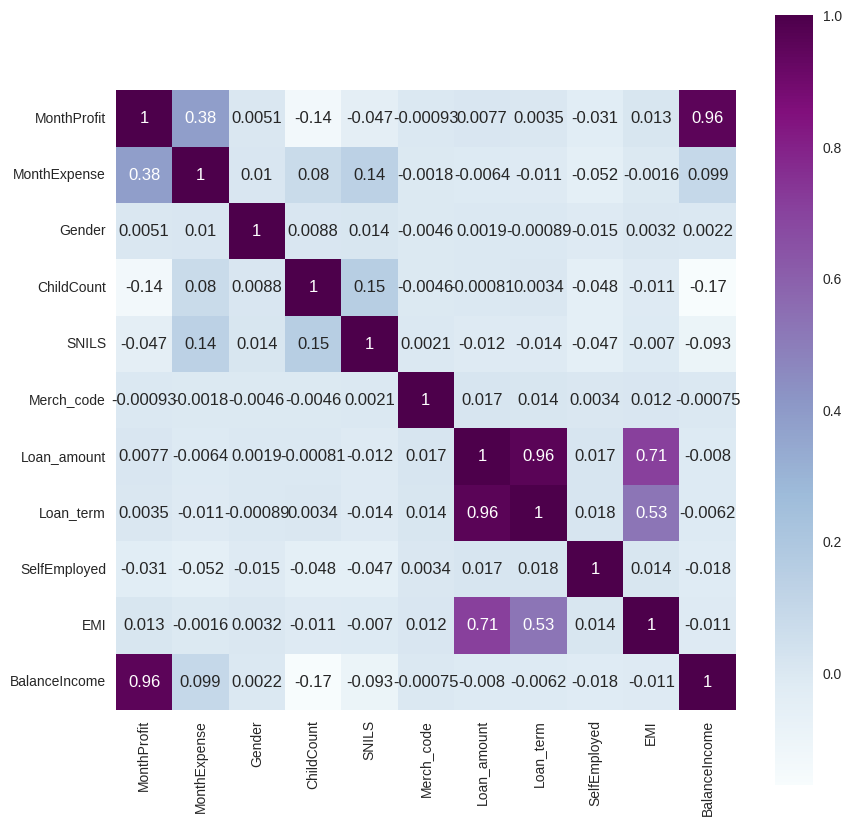

In [33]:
# Let's have another look at our feature correlation map
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

As we can observe our added new features have better correlation with target variable than features from the input dataset, albeit they are still very low correlated with the target variable.

In [34]:
# Let's drop some features that have high collinearity with new features and very low collinearity with target variable:
df = df.drop(['MonthProfit', 'MonthExpense', 'Loan_amount', 'Loan_term', 'JobStartDate', 'BirthDate'], axis=1)

## Summary

We have added six new features:
1. "ProfessionalRisk" - professional risk level of an applicant:
  0 - low risk
  1 - medium risk
  2 - high risk
2. "SelfEmployed" - boolean which specifies wheter an applicant is self employed or not
  0 - not self employed
  1 - self employed
3. "YearsWorkingOnCurrentJob" - characterizes how long an apllicant is working on his last job position. We grouped years in 4 ranges:
  '0-3 года' - less than 3 years
  '3-6 лет' - 3 to 6 years
  '6-10 лет' - 6 to 10 years
  'больше 10 лет' - more than 10 years
4. "AgeGroup" - applicant's age group. We devided applicants into eight groups:
  1. 0-18 - In fact, banks do not have the right to approve a loan under for applicants that haven't reached 18 years.
  2. 18-21 - Before age 21, the likelihood of approval should not be very high.
  3. 21-25 - At this age, the likelihood of approval is still not very high.
  4. 25-45 - Working age, so the likelihood of approval should be maximum.
  5. 45-55 - Probably, here it should be a little lower than in the previous group.
  6. 55-75 - Retirement age, so the probability here should be even lower than in the previous group.
  7. 75-85 - But for this group, according to information from the Internet, there are some benefits, so here we expect a good probability of approval.
  8. 85-130 - Well, here, of course, there will probably be the lowest percentage of approval.
5. "EMI" - Equated Monthly Installment, or how much should an applicant pay for his credit.
6. "BalanceIncome" - The net of applicant's receipts/credits and his payments/debits.

  [BalanceIncome] = [MonthProfit] - [MonthExpense] - [EMI]

We have removed features 'MonthProfit', 'MonthExpense', 'Loan_amount', 'Loan_term', 'JobStartDate', 'BirthDate', that have high collinearity with new features and very low collinearity with target variable:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6603 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   education                6603 non-null   object 
 1   employment status        6603 non-null   object 
 2   Value                    6603 non-null   object 
 3   Position                 6603 non-null   object 
 4   Gender                   6603 non-null   float64
 5   Family status            6603 non-null   object 
 6   ChildCount               6603 non-null   float64
 7   SNILS                    6603 non-null   float64
 8   BankA_decision           6603 non-null   object 
 9   BankB_decision           6603 non-null   object 
 10  BankC_decision           6603 non-null   object 
 11  BankD_decision           6603 non-null   object 
 12  BankE_decision           6603 non-null   object 
 13  Merch_code               6603 non-null   float64
 14  Goods_category    

To sum up, now we have 15 features, that will be used for prediction of BankA, BankB, BankC, BankD, BankE decisions on loan approval.
Other 5 columns 'BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision' and 'BankE_decision' will be our target variables that will be used to predict loan approvals of BankA, BankB, BankC, BankD and BankE correspondingly.



In [36]:
# Let's save our dataset, as we will be reloading it several times during models training prosess.
df.to_csv(r"df_with_features.csv", sep=';')

# Model training and evaluation

## Define common parameters

In [37]:
VAL_SET_SIZE = 0.25
SEED = 2021
CRITERIA = 'auc'

## BankA Model

### Preparing data

In [43]:
TARGET = 'BankA_decision'

df_A = pd.read_csv(filepath_or_buffer='/content/df_with_features.csv', sep=';')
df_A = df_A.drop(columns=['BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'SkillFactory_Id'], axis=1)
df_A['Merch_code'] = pd.Categorical(df_A['Merch_code'])

# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_A[TARGET].replace('denied', 0, inplace=True)
df_A[TARGET].replace('success', 1, inplace=True)
df_A[TARGET].replace('error', -1, inplace=True)
df_A = df_A[df_A.BankA_decision >= 0]

In [44]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6532 entries, 0 to 6602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   education                6532 non-null   object  
 1   employment status        6532 non-null   object  
 2   Value                    6532 non-null   object  
 3   Position                 6532 non-null   object  
 4   Gender                   6532 non-null   float64 
 5   Family status            6532 non-null   object  
 6   ChildCount               6532 non-null   float64 
 7   SNILS                    6532 non-null   float64 
 8   BankA_decision           6532 non-null   int64   
 9   Merch_code               6532 non-null   category
 10  Goods_category           6532 non-null   object  
 11  ProfRisk                 6532 non-null   int64   
 12  SelfEmployed             6532 non-null   int64   
 13  YearsWorkedOnCurrentJob  6532 non-null   object  
 14  AgeGroup

In [45]:
X = df_A.drop([TARGET],axis = 1)
X = pd.get_dummies(X)
y = df_A[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

# Apply SMOTE balancing
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

df_A = X_train_over
df_A[TARGET] = y_train_over

In [46]:
pd.Series(y_train_over).value_counts()

1    3101
0    3101
Name: BankA_decision, dtype: int64

### Compare models

In [47]:
setup(df_A, target=TARGET, session_id=125, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,125
1,Target,BankA_decision
2,Target type,Binary
3,Original data shape,"(6202, 258)"
4,Transformed data shape,"(6202, 258)"
5,Transformed train set shape,"(4341, 258)"
6,Transformed test set shape,"(1861, 258)"
7,Numeric features,257
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
# compare baseline models, sort them by AUC metric and select top 5 models
top5 = compare_models(sort = 'auc', n_select = 5, errors = "raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8602,0.8917,0.9548,0.8032,0.8723,0.7204,0.7340,0.7910
et,Extra Trees Classifier,0.8489,0.8861,0.9276,0.8016,0.8599,0.6978,0.7070,0.7250
xgboost,Extreme Gradient Boosting,0.8526,0.8855,0.9318,0.8046,0.8634,0.7052,0.7144,0.8400
lightgbm,Light Gradient Boosting Machine,0.8650,0.8846,0.9627,0.8054,0.8770,0.7300,0.7445,0.2180
gbc,Gradient Boosting Classifier,0.8668,0.8760,0.9885,0.7953,0.8813,0.7337,0.7566,1.7010
ada,Ada Boost Classifier,0.8675,0.8748,0.9931,0.7939,0.8823,0.7351,0.7595,0.6850
lda,Linear Discriminant Analysis,0.8655,0.8746,0.9853,0.7949,0.8799,0.7309,0.7529,1.3180
catboost,CatBoost Classifier,0.8666,0.8742,0.9834,0.7974,0.8806,0.7332,0.7543,34.7500
dt,Decision Tree Classifier,0.7842,0.7842,0.7839,0.7846,0.7839,0.5683,0.5688,0.1040
knn,K Neighbors Classifier,0.6856,0.7436,0.6341,0.7072,0.6681,0.3711,0.3736,0.3740


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

As we see from the table,the best model with highest AUC value is Random Forest Classifier.Besides AUC=0.8917 it has also high F1 score=0.8723,we can definitely choose it for BankA approval prediction.
However Light Gradient Boosting have shown almost same AUC metric = 0.8846, has a higher F1 score=0.8770 and has lower training time (0.2180 sec compared to 0.7910 for RF), so we should also consider using this model. Let's compare them and see which one performs better on validation set.

In [ ]:
random_forest = top5[0]
lightgbm = top5[3]

In [ ]:
def compare_values(row):
  return row['Bank_decision'] == row['prediction_label']

In [ ]:
y_val.value_counts()

1    1227
0     406
Name: BankA_decision, dtype: int64

In [ ]:
val_results = predict_model(random_forest, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 21   385
1                 59  1168


In [ ]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8402877697841725


In [ ]:
val_results = predict_model(lightgbm, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix: 
 prediction_label   0     1
Bank_decision             
0                 14   392
1                 60  1167


In [ ]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8323615160349854


As we have found out, Random Forest Classifier performs better on validation dataset, so we will choose it as the best model.

In [ ]:
bestA = random_forest

### Evaluate best model

In [ ]:
evaluate_model(bestA)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

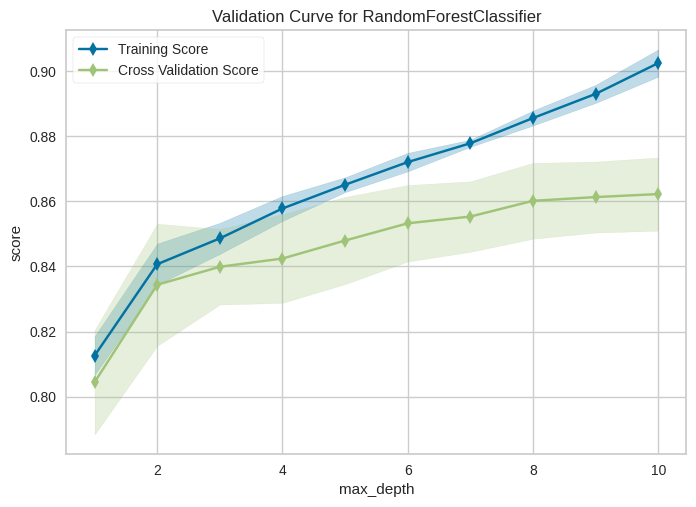

In [ ]:
# plot validation curve
plot_model(bestA, plot = 'vc')

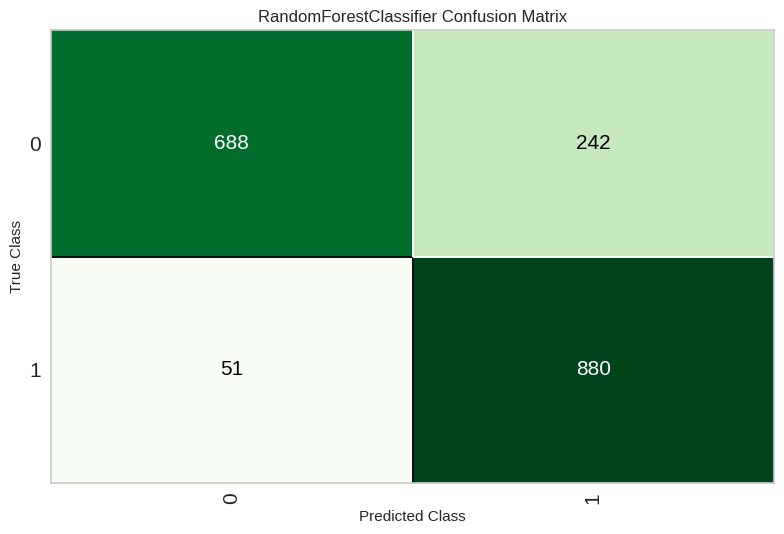

In [ ]:
# plot confusion matrix
plot_model(bestA, plot = 'confusion_matrix')

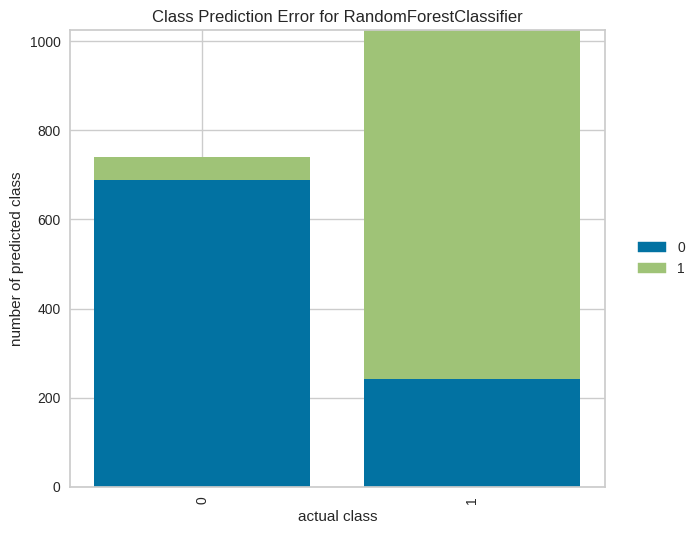

In [ ]:
plot_model(bestA, plot = 'error')

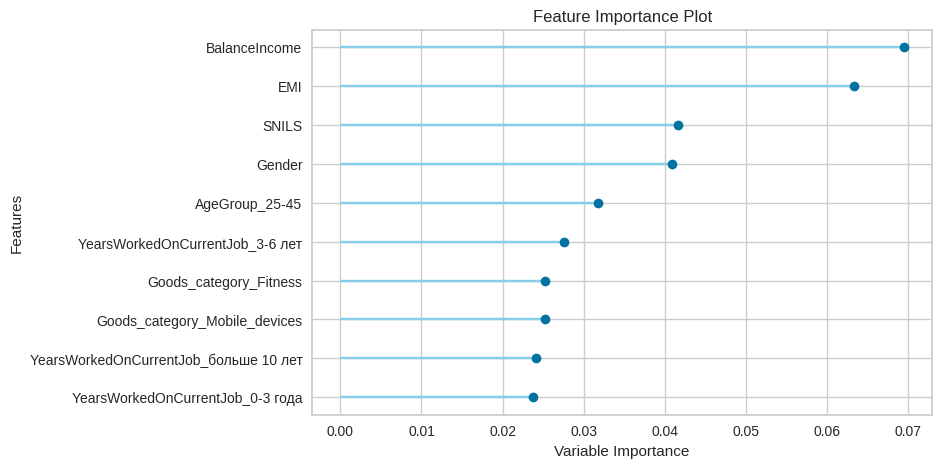

In [ ]:
plot_model(bestA, plot='feature')

In [ ]:
expA.predict_model(bestA, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8387,0.8777,0.9399,0.7816,0.8534,0.6774,0.6917


,Gender,ChildCount,SNILS,Merch_code,EMI,BalanceIncome,YearsWorkedOnCurrentJob,ProfRisk,SelfEmployed,Age,...,Goods_category_Fitness,Goods_category_Furniture,Goods_category_Medical_services,Goods_category_Mobile_devices,Goods_category_Other,Goods_category_Travel,BankA_decision,prediction_label,prediction_score_0,prediction_score_1
5910,0.203782,0.0,0.0,25.497879,6132.705566,91617.296875,1,0,0,21,...,0,0,0,0,0,0,0,0,1.00,0.00
743,0.000000,0.0,1.0,32.000000,7444.439941,142555.562500,6,0,0,35,...,0,0,0,0,0,0,1,1,0.21,0.79
1780,0.000000,0.0,1.0,18.000000,7833.330078,77166.671875,11,0,1,33,...,0,0,1,0,0,0,0,1,0.22,0.78
1616,1.000000,0.0,0.0,10.000000,4250.000000,250750.000000,16,0,0,35,...,0,0,0,0,1,0,1,1,0.26,0.74
5126,0.000000,0.0,0.0,47.304123,5967.354004,147467.359375,3,0,0,40,...,0,0,0,0,0,1,0,0,0.77,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0.000000,0.0,1.0,19.000000,2166.669922,23045.330078,4,0,0,22,...,0,0,1,0,0,0,1,1,0.32,0.68
1884,0.000000,0.0,0.0,41.000000,1166.670044,83833.328125,1,0,0,51,...,0,0,0,0,0,1,1,1,0.34,0.66
758,0.000000,0.0,0.0,31.000000,8083.330078,126916.671875,23,0,0,47,...,0,0,0,0,0,0,0,1,0.19,0.81
5664,0.000000,0.0,0.0,34.220623,6337.277344,113757.445312,5,0,0,30,...,0,0,0,0,0,0,0,0,0.99,0.01


### Tune hyperparameters

In [ ]:
tune_modelA = tune_model(bestA,fold=10, n_iter=50, optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8575,0.8709,0.9908,0.7818,0.8740,0.7151,0.7419
1,0.8272,0.8689,0.9908,0.7465,0.8515,0.6544,0.6925
2,0.8548,0.8744,1.0000,0.7750,0.8732,0.7097,0.7416
3,0.8479,0.8897,0.9908,0.7706,0.8669,0.6959,0.7261
4,0.8687,0.9055,0.9862,0.7985,0.8825,0.7373,0.7586
5,0.8641,0.8973,0.9954,0.7883,0.8798,0.7281,0.7546
6,0.8664,0.8933,0.9816,0.7978,0.8802,0.7327,0.7530
7,0.8571,0.8882,0.9954,0.7798,0.8745,0.7143,0.7433
8,0.8571,0.8740,0.9862,0.7839,0.8735,0.7143,0.7393


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_modelA = tune_model(bestA, search_library = 'optuna', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8621,0.8811,0.9816,0.7918,0.8765,0.7243,0.7459
1,0.8387,0.8718,0.9908,0.7597,0.8600,0.6774,0.7111
2,0.8618,0.8790,0.9908,0.7875,0.8776,0.7235,0.7489
3,0.8479,0.8909,0.9770,0.7766,0.8653,0.6959,0.7202
4,0.8779,0.9139,0.9954,0.8060,0.8907,0.7558,0.7775
5,0.8733,0.9050,0.9908,0.8022,0.8866,0.7465,0.7681
6,0.8733,0.9112,0.9816,0.8068,0.8857,0.7465,0.7647
7,0.8618,0.8963,0.9862,0.7897,0.8770,0.7235,0.7470
8,0.8641,0.8791,0.9770,0.7970,0.8778,0.7281,0.7474


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_modelA = tune_model(bestA, search_library = 'scikit-optimize', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8307,0.8632,0.9774,0.7552,0.8521,0.6616,0.6920
1,0.8307,0.8593,0.9774,0.7552,0.8521,0.6616,0.6920
2,0.8646,0.8867,0.9775,0.7978,0.8785,0.7290,0.7483
3,0.8510,0.8868,0.9865,0.7766,0.8690,0.7018,0.7291
4,0.8284,0.8702,0.9640,0.7589,0.8492,0.6567,0.6822
5,0.8235,0.8399,0.9638,0.7527,0.8452,0.6471,0.6741
6,0.8462,0.8559,0.9910,0.7684,0.8656,0.6923,0.7233
7,0.8348,0.8798,0.9502,0.7721,0.8519,0.6697,0.6883
8,0.8620,0.8862,0.9955,0.7857,0.8782,0.7240,0.7512


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_modelA = tune_model(bestA, search_library = 'tune-sklearn', search_algorithm = 'hyperopt', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8330,0.8667,0.9910,0.7526,0.8555,0.6662,0.7021
1,0.8352,0.8554,0.9910,0.7552,0.8571,0.6707,0.7057
2,0.8578,0.8902,0.9775,0.7891,0.8732,0.7154,0.7368
3,0.8578,0.8756,0.9910,0.7829,0.8748,0.7154,0.7423
4,0.8465,0.8871,0.9955,0.7674,0.8667,0.6928,0.7258
5,0.8416,0.8532,0.9955,0.7612,0.8627,0.6833,0.7181
6,0.8371,0.8522,0.9864,0.7596,0.8583,0.6742,0.7064
7,0.8507,0.8812,0.9864,0.7758,0.8685,0.7014,0.7287
8,0.8688,0.8915,1.0000,0.7921,0.8840,0.7376,0.7643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023-12-12 15:36:15,212	INFO worker.py:1673 -- Started a local Ray instance.
2023-12-12 15:36:16,586	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-12-12 15:36:16,589	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-12-12_15-36-16   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-12-12_15-36-16
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-12-12_15-36-16`

Trial status: 1 PENDING
Current time: 2023-12-12 15:36:20. Total running time: 0s
Logical resource usage: 0/8 CPUs, 0/1 GPUs
+--------------------------------+
| Trial name            status   |
+--------------------------------+
| _Trainable_6f86f970   PENDING  |
+--------------------------------+

Trial _Tr

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Unfortunately, hyperparameter optimizations haven't helped to improve the model performance.

### Save model

In [ ]:
final_modelA = finalize_model(tune_modelA)
save_model(final_modelA, 'best_bankA')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'ProfRisk', 'SelfEmployed', 'EMI',
                                              'BalanceIncome', 'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное среднее',
                                              'education_Неск...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         m

## BankB Model

### Preparing data

In [ ]:
TARGET = 'BankB_decision'

df_B = pd.read_csv(filepath_or_buffer='/content/df_with_features.csv', sep=';')
df_B = df_B.drop(columns=['BankA_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'SkillFactory_Id'], axis=1)
df_B['Merch_code'] = pd.Categorical(df_B['Merch_code'])

# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_B[TARGET].replace('denied', 0, inplace=True)
df_B[TARGET].replace('success', 1, inplace=True)
df_B[TARGET].replace('error', -1, inplace=True)
df_B = df_B[df_B.BankB_decision >= 0]

In [ ]:
X = df_B.drop([TARGET],axis = 1)
X = pd.get_dummies(X)
y = df_B[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

# Apply SMOTE balancing
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [ ]:
df_B = X_train_over
df_B[TARGET] = y_train_over

### Compare models

In [ ]:
setup(df_B, target=TARGET, session_id=122, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,122
1,Target,BankB_decision
2,Target type,Binary
3,Original data shape,"(6062, 258)"
4,Transformed data shape,"(6062, 258)"
5,Transformed train set shape,"(4243, 258)"
6,Transformed test set shape,"(1819, 258)"
7,Numeric features,257
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
# compare baseline models
top5 = compare_models(sort = 'auc', n_select = 5, errors = "raise")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:50:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8423,0.8782,0.9363,0.7886,0.8559,0.6847,0.6976,0.9100
lightgbm,Light Gradient Boosting Machine,0.8447,0.8730,0.9486,0.7855,0.8593,0.6894,0.7049,0.2650
xgboost,Extreme Gradient Boosting,0.8364,0.8720,0.9236,0.7867,0.8496,0.6729,0.6836,0.5460
gbc,Gradient Boosting Classifier,0.8558,0.8718,0.9887,0.7812,0.8727,0.7115,0.7383,1.5520
et,Extra Trees Classifier,0.8244,0.8693,0.8958,0.7846,0.8362,0.6488,0.6562,0.9300
ada,Ada Boost Classifier,0.8529,0.8652,0.9840,0.7798,0.8700,0.7059,0.7315,0.5040
lda,Linear Discriminant Analysis,0.8508,0.8651,0.9802,0.7790,0.8680,0.7016,0.7265,0.3450
dt,Decision Tree Classifier,0.7570,0.7570,0.7515,0.7600,0.7556,0.5140,0.5143,0.1570
knn,K Neighbors Classifier,0.6611,0.7234,0.5997,0.6844,0.6387,0.3222,0.3252,0.1270
nb,Naive Bayes,0.5237,0.6857,0.1080,0.6548,0.1845,0.0472,0.0886,0.0670


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8423,0.8782,0.9363,0.7886,0.8559,0.6847,0.6976,0.9100
lightgbm,Light Gradient Boosting Machine,0.8447,0.8730,0.9486,0.7855,0.8593,0.6894,0.7049,0.2650
xgboost,Extreme Gradient Boosting,0.8364,0.8720,0.9236,0.7867,0.8496,0.6729,0.6836,0.5460
gbc,Gradient Boosting Classifier,0.8558,0.8718,0.9887,0.7812,0.8727,0.7115,0.7383,1.5520
et,Extra Trees Classifier,0.8244,0.8693,0.8958,0.7846,0.8362,0.6488,0.6562,0.9300
catboost,CatBoost Classifier,0.8567,0.8683,0.9868,0.7832,0.8732,0.7134,0.7390,26.9530
ada,Ada Boost Classifier,0.8529,0.8652,0.9840,0.7798,0.8700,0.7059,0.7315,0.5040
lda,Linear Discriminant Analysis,0.8508,0.8651,0.9802,0.7790,0.8680,0.7016,0.7265,0.3450
dt,Decision Tree Classifier,0.7570,0.7570,0.7515,0.7600,0.7556,0.5140,0.5143,0.1570
knn,K Neighbors Classifier,0.6611,0.7234,0.5997,0.6844,0.6387,0.3222,0.3252,0.1270


In [ ]:
# Here again Random Forest has the best AUC metrics, so we will choose this model for BankB approval prediction as well.
bestB = top5[0]

### Evaluate best model

In [ ]:
evaluate_model(bestB)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

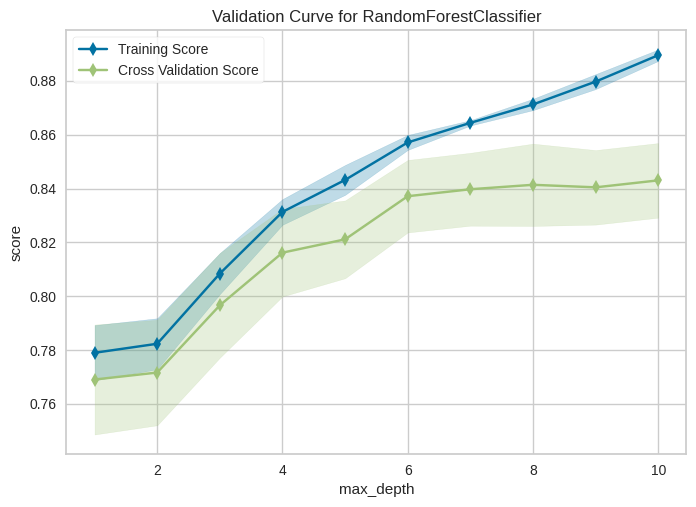

In [ ]:
# plot validation curve
plot_model(bestB, plot = 'vc')

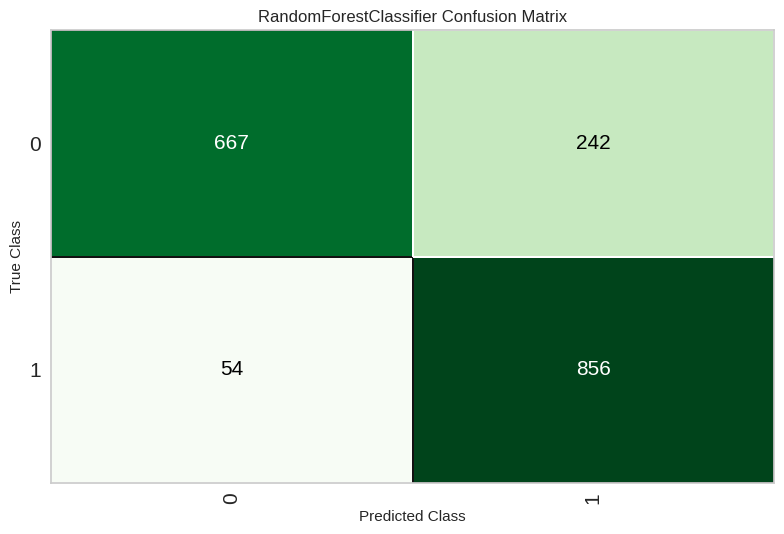

In [ ]:
# plot confusion matrix
plot_model(bestB, plot = 'confusion_matrix')

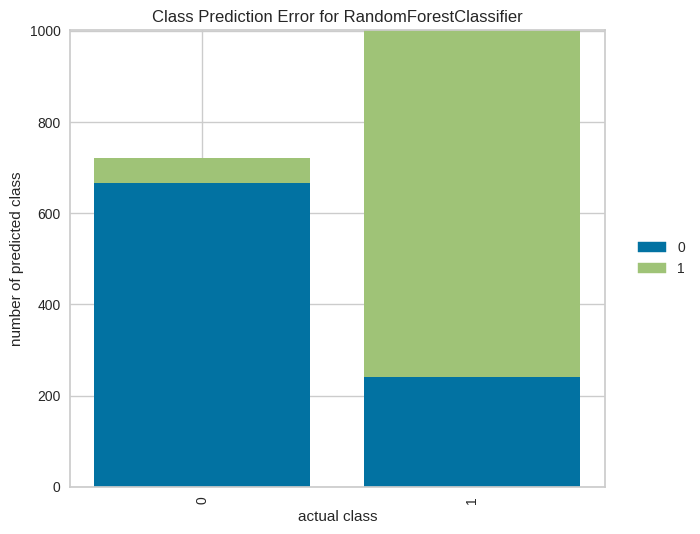

In [ ]:
plot_model(bestB, plot = 'error')

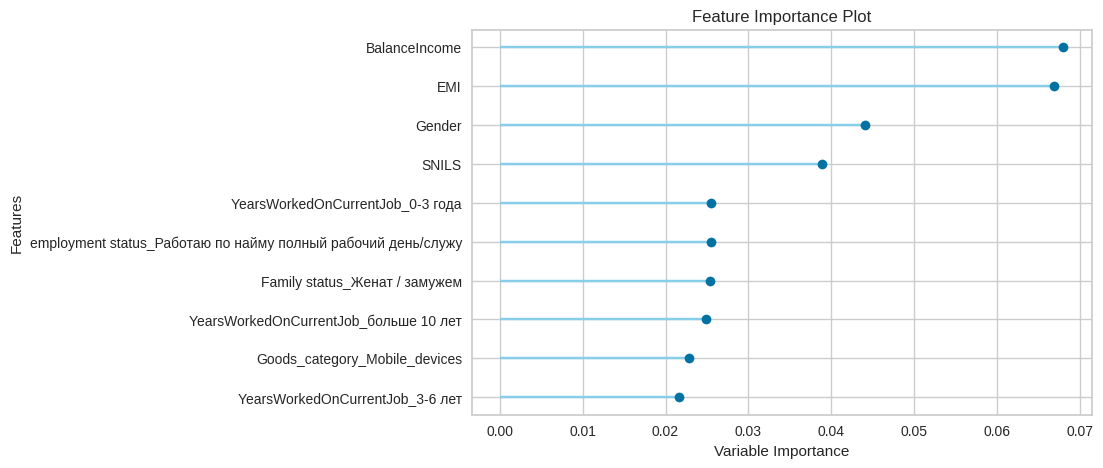

In [ ]:
plot_model(bestB, plot = 'feature')

In [ ]:
val_results = predict_model(bestB, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 18   395
1                 76  1143


In [ ]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8291621327529924


### Tune hyperparameters

In [ ]:
tune_modelB = tune_model(bestB, fold=10, n_iter=50, optimize = CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8518,0.8782,0.9906,0.7757,0.8701,0.7033,0.7322
1,0.8329,0.8587,0.9906,0.7527,0.8554,0.6661,0.7019
2,0.8541,0.8892,0.9906,0.7778,0.8714,0.7084,0.7363
3,0.8208,0.8562,0.9764,0.7446,0.8449,0.6415,0.6751
4,0.8396,0.8753,0.9906,0.7609,0.8607,0.6792,0.7125
5,0.8231,0.8678,0.9811,0.7455,0.8473,0.6462,0.6811
6,0.8656,0.9127,0.9811,0.7969,0.8795,0.7311,0.7515
7,0.8113,0.8523,0.9953,0.7276,0.8406,0.6226,0.6696
8,0.8396,0.8723,0.9953,0.7590,0.8612,0.6792,0.7148


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_modelB = tune_model(tune_modelB, search_library = 'optuna', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5012,0.8593,1.0000,0.5012,0.6677,0.0000,0.0000
1,0.5012,0.8847,1.0000,0.5012,0.6677,0.0000,0.0000
2,0.5012,0.8741,1.0000,0.5012,0.6677,0.0000,0.0000
3,0.5012,0.8918,1.0000,0.5012,0.6677,0.0000,0.0000
4,0.4988,0.8553,1.0000,0.4988,0.6656,0.0000,0.0000
5,0.4988,0.8695,1.0000,0.4988,0.6656,0.0000,0.0000
6,0.4988,0.8689,1.0000,0.4988,0.6656,0.0000,0.0000
7,0.4988,0.8784,1.0000,0.4988,0.6656,0.0000,0.0000
8,0.4988,0.8651,1.0000,0.4988,0.6656,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Hyperparameter tuning has not helped to improve the metrics.

### Save model

In [ ]:
final_modelB = finalize_model(tune_modelB)
save_model(final_modelB, 'best_bankB')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'ProfRisk', 'SelfEmployed', 'EMI',
                                              'BalanceIncome', 'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное среднее',
                                              'education_Неск...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         m

## BankC Model

### Preparing data

In [38]:
TARGET = 'BankC_decision'

df_C = pd.read_csv(filepath_or_buffer='/content/df_with_features.csv', sep=';')
df_C = df_C.drop(columns=['BankA_decision', 'BankB_decision', 'BankD_decision', 'BankE_decision', 'SkillFactory_Id'], axis=1)
df_C['Merch_code'] = pd.Categorical(df_C['Merch_code'])

# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_C[TARGET].replace('denied', 0, inplace=True)
df_C[TARGET].replace('success', 1, inplace=True)
df_C[TARGET].replace('error', -1, inplace=True)
df_C = df_C[df_C.BankC_decision >= 0]

In [39]:
X = df_C.drop([TARGET],axis = 1)
X = pd.get_dummies(X)
y = df_C[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

# Apply SMOTE balancing
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

df_C = X_train_over
df_C[TARGET] = y_train_over

### Compare models

In [40]:
setup(df_C, target = 'BankC_decision', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BankC_decision
2,Target type,Binary
3,Original data shape,"(6144, 258)"
4,Transformed data shape,"(6144, 258)"
5,Transformed train set shape,"(4300, 258)"
6,Transformed test set shape,"(1844, 258)"
7,Numeric features,257
8,Preprocess,True
9,Imputation type,simple


In [41]:
# compare baseline models
top5 = compare_models(sort = 'AUC', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8493,0.8754,0.9470,0.7932,0.8628,0.6986,0.7134,0.6280
et,Extra Trees Classifier,0.8349,0.8692,0.9153,0.7893,0.8473,0.6698,0.6792,0.6870
xgboost,Extreme Gradient Boosting,0.8372,0.8687,0.9288,0.7861,0.8511,0.6744,0.6868,0.5160
lightgbm,Light Gradient Boosting Machine,0.8442,0.8680,0.9544,0.7829,0.8599,0.6884,0.7062,0.6420
catboost,CatBoost Classifier,0.8479,0.8658,0.9758,0.7779,0.8654,0.6958,0.7202,4.0740
gbc,Gradient Boosting Classifier,0.8505,0.8644,0.9870,0.7761,0.8687,0.7009,0.7289,1.5100
ada,Ada Boost Classifier,0.8440,0.8547,0.9902,0.7672,0.8642,0.6879,0.7201,0.4760
lda,Linear Discriminant Analysis,0.8479,0.8438,0.9828,0.7748,0.8662,0.6958,0.7231,0.4300
dt,Decision Tree Classifier,0.7665,0.7665,0.7684,0.7664,0.7670,0.5330,0.5335,0.1260
qda,Quadratic Discriminant Analysis,0.7605,0.7605,0.7130,0.7763,0.6440,0.5209,0.5571,0.1700


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [42]:
# Here again Random Forest has the best AUC metrics, so we will choose this model for BankB approval prediction as well.
bestC = top5[0]

### Evaluate best model

In [43]:
evaluate_model(bestC)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

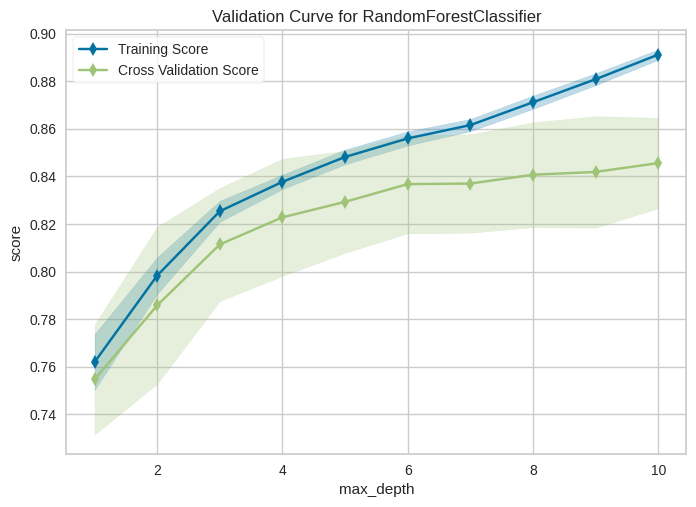

In [44]:
# plot validation curve
plot_model(bestC, plot = 'vc')

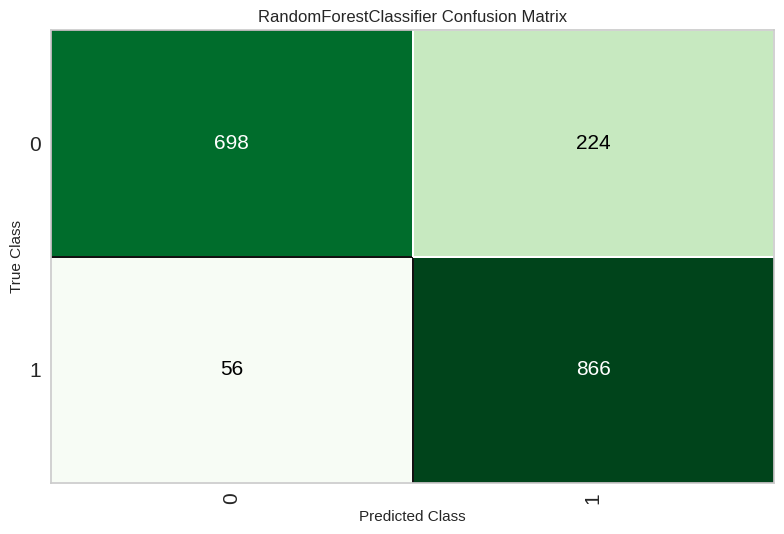

In [45]:
# plot confusion matrix
plot_model(bestC, plot = 'confusion_matrix')

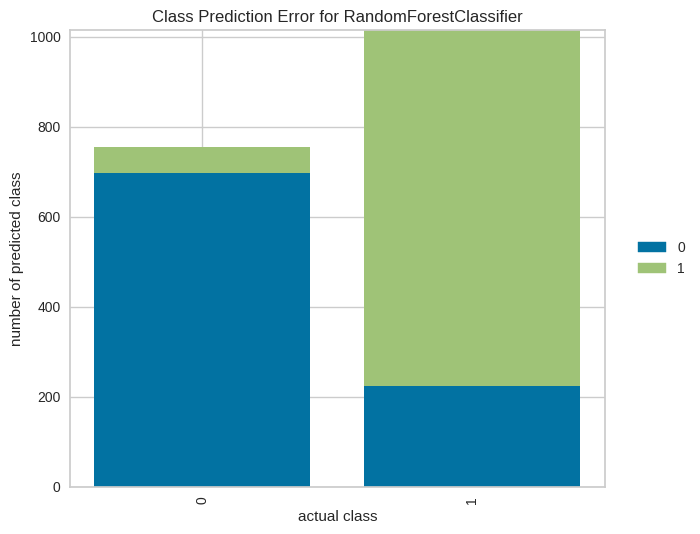

In [46]:
# plot error
plot_model(bestC, plot = 'error')

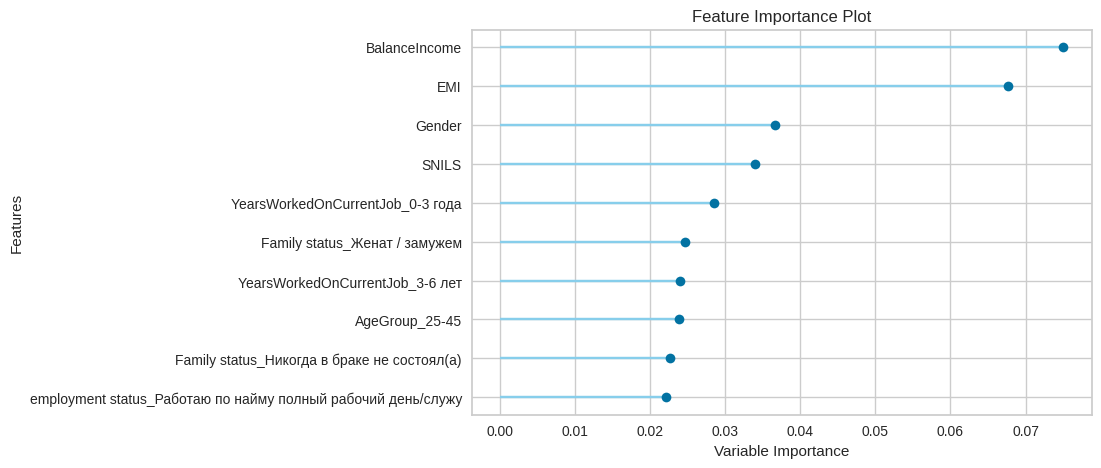

In [47]:
# plot feature importance
plot_model(bestC, plot = 'feature')

In [48]:
val_results = predict_model(bestC, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 21   384
1                 87  1144


In [49]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8292859731786879


### Tune hyperparameters

In [50]:
tune_modelC = tune_model(bestC, fold=10, n_iter=20, optimize = CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8256,0.8606,0.9907,0.7448,0.8503,0.6512,0.6899
1,0.8837,0.8945,0.9814,0.8210,0.8941,0.7674,0.7825
2,0.8279,0.8348,0.9814,0.7509,0.8508,0.6558,0.6891
3,0.8116,0.8281,0.9721,0.7359,0.8377,0.6233,0.6581
4,0.8163,0.8418,0.9814,0.7378,0.8423,0.6326,0.6702
5,0.8372,0.8658,0.9814,0.7617,0.8577,0.6744,0.7043
6,0.8209,0.8299,0.9767,0.7447,0.8451,0.6419,0.6755
7,0.8535,0.8882,1.0000,0.7734,0.8722,0.7070,0.7394
8,0.8442,0.8602,0.9767,0.7721,0.8624,0.6884,0.7139


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
tune_modelC = tune_model(tune_modelC, search_library = 'optuna', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8349,0.8734,0.9953,0.7535,0.8577,0.6698,0.7072
1,0.9023,0.9149,0.9814,0.8474,0.9095,0.8047,0.8149
2,0.8442,0.8594,0.9907,0.7662,0.8641,0.6884,0.7200
3,0.8395,0.8445,1.0000,0.7570,0.8617,0.6791,0.7170
4,0.8372,0.8652,0.9953,0.7562,0.8594,0.6744,0.7109
5,0.8558,0.8732,0.9907,0.7802,0.8730,0.7116,0.7390
6,0.8395,0.8580,0.9907,0.7607,0.8606,0.6791,0.7124
7,0.8605,0.8798,0.9907,0.7860,0.8765,0.7209,0.7467
8,0.8605,0.8751,0.9860,0.7881,0.8760,0.7209,0.7448


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Hyperparameter has not helped to improve the metrics.

Let's test on validation test:

In [52]:
val_results = predict_model(tune_modelC, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 21   384
1                 87  1144


In [53]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8292859731786879


### Save model

In [55]:
final_modelC = finalize_model(tune_modelC)
save_model(final_modelC, 'best_bankC')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'ProfRisk', 'SelfEmployed', 'EMI',
                                              'BalanceIncome', 'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное среднее',
                                              'education_Неск...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         m

## BankD Model

### Preparing data

In [93]:
TARGET = 'BankD_decision'

df_D = pd.read_csv(filepath_or_buffer='/content/df_with_features.csv', sep=';')
df_D = df_D.drop(columns=['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankE_decision', 'SkillFactory_Id'], axis=1)
df_D['Merch_code'] = pd.Categorical(df_D['Merch_code'])

# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_D[TARGET].replace('denied', 0, inplace=True)
df_D[TARGET].replace('success', 1, inplace=True)
df_D[TARGET].replace('error', -1, inplace=True)
df_D = df_D[df_D.BankD_decision >= 0]

In [94]:
X = df_D.drop([TARGET],axis = 1)
X = pd.get_dummies(X)
y = df_D[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

# Apply SMOTE balancing
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

df_D = X_train_over
df_D[TARGET] = y_train_over

### Compare models

In [95]:
setup(df_D, target = 'BankD_decision', session_id = 124)

,Description,Value
0,Session id,124
1,Target,BankD_decision
2,Target type,Binary
3,Original data shape,"(6218, 257)"
4,Transformed data shape,"(6218, 257)"
5,Transformed train set shape,"(4352, 257)"
6,Transformed test set shape,"(1866, 257)"
7,Numeric features,256
8,Preprocess,True
9,Imputation type,simple


In [96]:
# compare baseline models
top5 = compare_models(sort = 'AUC', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8433,0.8836,0.9356,0.7908,0.8568,0.6866,0.6992,0.6100
et,Extra Trees Classifier,0.8357,0.8748,0.9117,0.7926,0.8474,0.6714,0.6805,0.7180
xgboost,Extreme Gradient Boosting,0.8364,0.8735,0.9278,0.7852,0.8503,0.6728,0.6848,0.4870
lightgbm,Light Gradient Boosting Machine,0.8456,0.8724,0.9550,0.7844,0.8611,0.6912,0.7087,0.9140
ada,Ada Boost Classifier,0.8580,0.8711,0.9959,0.7813,0.8754,0.7160,0.7452,0.6020
catboost,CatBoost Classifier,0.8523,0.8700,0.9784,0.7820,0.8690,0.7045,0.7285,4.1090
gbc,Gradient Boosting Classifier,0.8546,0.8679,0.9890,0.7801,0.8720,0.7091,0.7366,1.1820
lda,Linear Discriminant Analysis,0.8500,0.8637,0.9802,0.7783,0.8675,0.6999,0.7253,0.4540
dt,Decision Tree Classifier,0.7799,0.7799,0.7762,0.7825,0.7790,0.5597,0.5602,0.1660
knn,K Neighbors Classifier,0.6703,0.7340,0.6135,0.6923,0.6499,0.3405,0.3432,0.1320


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

Again Random Forest is a leader. So let's just take this model as we did for three previous banks.

In [97]:
bestD = top5[0]

### Evaluate best model

In [98]:
val_results = predict_model(bestD, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 22   369
1                 64  1177


In [99]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8446358091137424


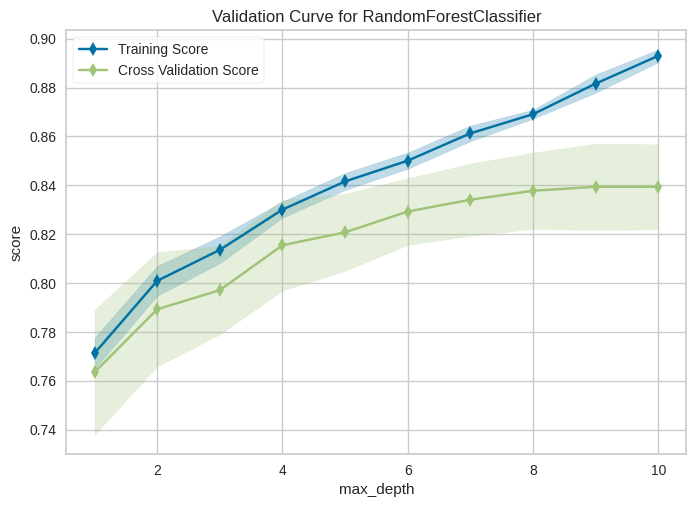

In [100]:
plot_model(bestD, plot="vc")

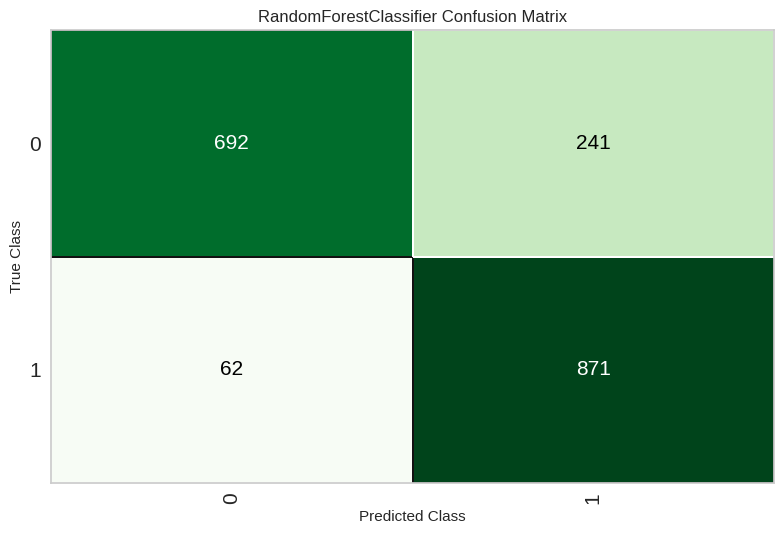

In [101]:
plot_model(bestD, plot="confusion_matrix")

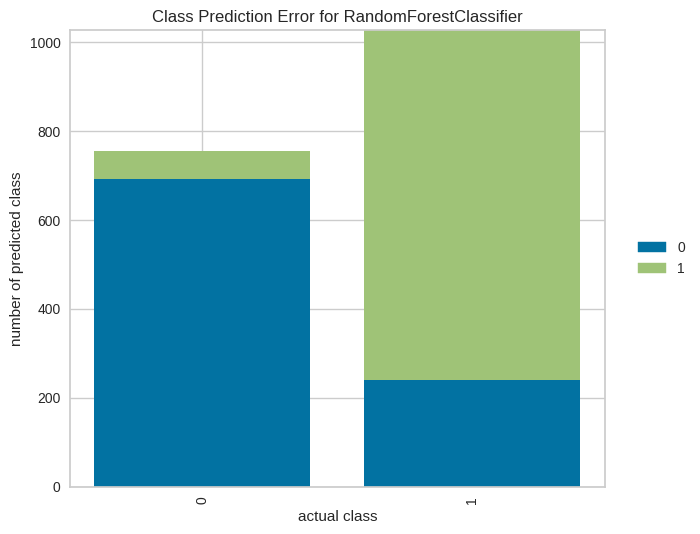

In [102]:
plot_model(bestD, plot="error")

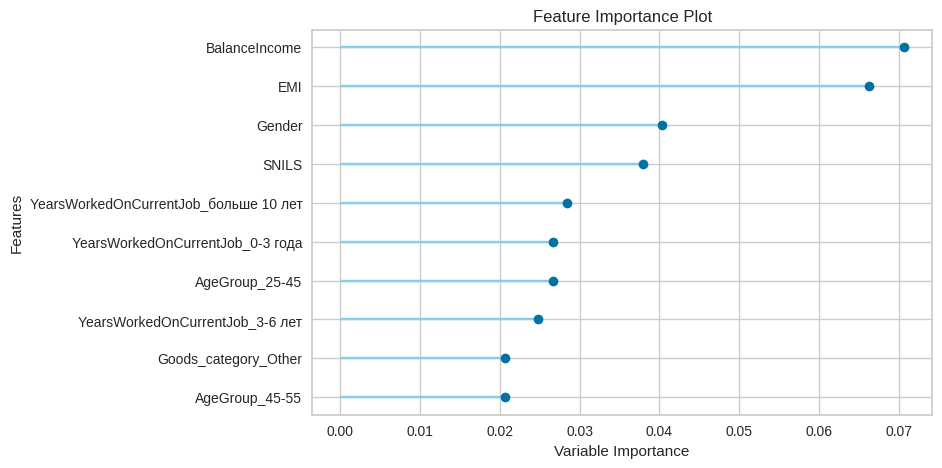

In [103]:
plot_model(bestD, plot='feature')

### Tune hyperparameters

In [72]:
tune_modelD = tune_model(bestD, search_library = 'optuna', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8096,0.8444,0.9633,0.7368,0.8350,0.6193,0.6508
1,0.8394,0.8757,0.9817,0.7643,0.8594,0.6789,0.7081
2,0.8069,0.8702,0.9495,0.7393,0.8313,0.6135,0.6401
3,0.8529,0.9049,0.9862,0.7790,0.8704,0.7056,0.7321
4,0.7977,0.8226,0.9817,0.7181,0.8295,0.5951,0.6400
5,0.8092,0.8374,0.9587,0.7385,0.8343,0.6181,0.6478
6,0.8322,0.8622,0.9677,0.7609,0.8519,0.6646,0.6904
7,0.8736,0.9083,0.9908,0.8022,0.8866,0.7473,0.7687
8,0.8184,0.8665,0.9862,0.7379,0.8442,0.6371,0.6762


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Again, tuning hasn't helped.

### Save model

In [73]:
final_modelD = finalize_model(tune_modelD)
save_model(final_modelD, 'best_bankD')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'ProfRisk', 'SelfEmployed', 'EMI',
                                              'BalanceIncome', 'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное среднее',
                                              'education_Неск...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         m

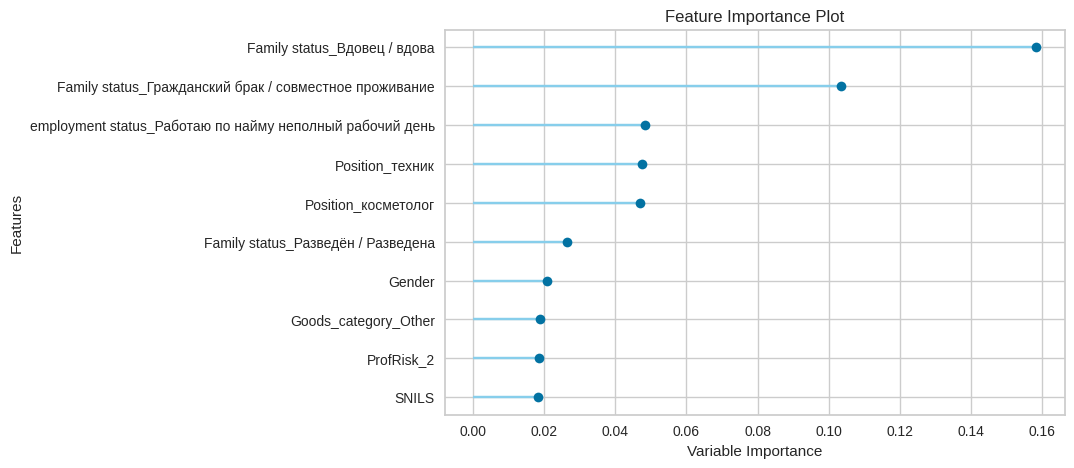

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'EMI', 'BalanceIncome',
                                              'YearsWorkedOnCurrentJob',
                                              'SelfEmployed', 'Age',
                                              'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное сре...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.05,
          

In [ ]:

save_model(final_modelD, 'best_bankD')

## BankE Model

### Preparing data

In [104]:
TARGET = 'BankE_decision'

df_E = pd.read_csv(filepath_or_buffer='/content/df_with_features.csv', sep=';')
df_E = df_E.drop(columns=['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'SkillFactory_Id'], axis=1)
df_E['Merch_code'] = pd.Categorical(df_E['Merch_code'])

# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_E[TARGET].replace('denied', 0, inplace=True)
df_E[TARGET].replace('success', 1, inplace=True)
df_E[TARGET].replace('error', -1, inplace=True)
df_E = df_E[df_E.BankE_decision >= 0]

In [108]:
X = df_E.drop([TARGET],axis = 1)
X = pd.get_dummies(X)
y = df_E[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

# Apply SMOTE balancing
smote = SMOTETomek(random_state=SEED)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

df_E = X_train_over
df_E[TARGET] = y_train_over

### Compare models

In [109]:
setup(df_E, target = 'BankE_decision', session_id = 126)

,Description,Value
0,Session id,126
1,Target,BankE_decision
2,Target type,Binary
3,Original data shape,"(6142, 257)"
4,Transformed data shape,"(6142, 257)"
5,Transformed train set shape,"(4299, 257)"
6,Transformed test set shape,"(1843, 257)"
7,Numeric features,256
8,Preprocess,True
9,Imputation type,simple


In [110]:
# compare baseline models
top5 = compare_models(sort = 'AUC', n_select = 5, errors = "raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8595,0.8861,0.9581,0.8008,0.8722,0.7190,0.7338,0.6080
lightgbm,Light Gradient Boosting Machine,0.8600,0.8807,0.9577,0.8016,0.8726,0.7199,0.7343,1.1710
xgboost,Extreme Gradient Boosting,0.8500,0.8806,0.9340,0.8001,0.8617,0.6999,0.7102,0.4960
et,Extra Trees Classifier,0.8460,0.8805,0.9191,0.8024,0.8565,0.6920,0.7000,1.0300
ada,Ada Boost Classifier,0.8658,0.8797,0.9888,0.7940,0.8807,0.7315,0.7549,0.5260
gbc,Gradient Boosting Classifier,0.8618,0.8774,0.9814,0.7924,0.8767,0.7236,0.7454,1.6510
catboost,CatBoost Classifier,0.8625,0.8765,0.9772,0.7953,0.8768,0.7250,0.7450,5.6870
lda,Linear Discriminant Analysis,0.8614,0.8738,0.9809,0.7920,0.8763,0.7227,0.7446,0.4190
dt,Decision Tree Classifier,0.7792,0.7793,0.7740,0.7822,0.7778,0.5585,0.5589,0.1670
qda,Quadratic Discriminant Analysis,0.7437,0.7437,0.6553,0.7945,0.6746,0.4874,0.5144,0.2720


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

Again the best model is Random Forest.

In [115]:
bestE = top5[0]

### Evaluate best model

In [112]:
val_results = predict_model(bestE, data=X_val)
val_results["Bank_decision"] = y_val
print("Confusion matrix:: \n", pd.crosstab(val_results.Bank_decision, val_results.prediction_label))

Confusion matrix:: 
 prediction_label   0     1
Bank_decision             
0                 25   385
1                 54  1169


In [113]:
print('F1 Score on validation dataset:', f1_score(val_results.Bank_decision, val_results.prediction_label))

F1 Score on validation dataset: 0.8419157364061937


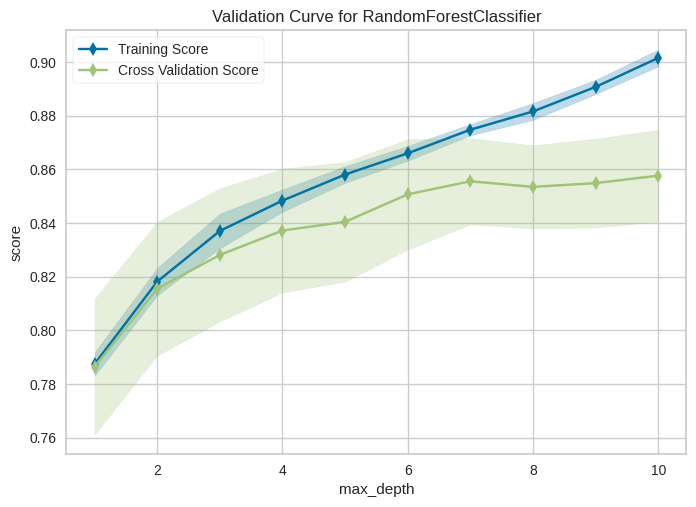

In [114]:
plot_model(bestE, plot="vc")

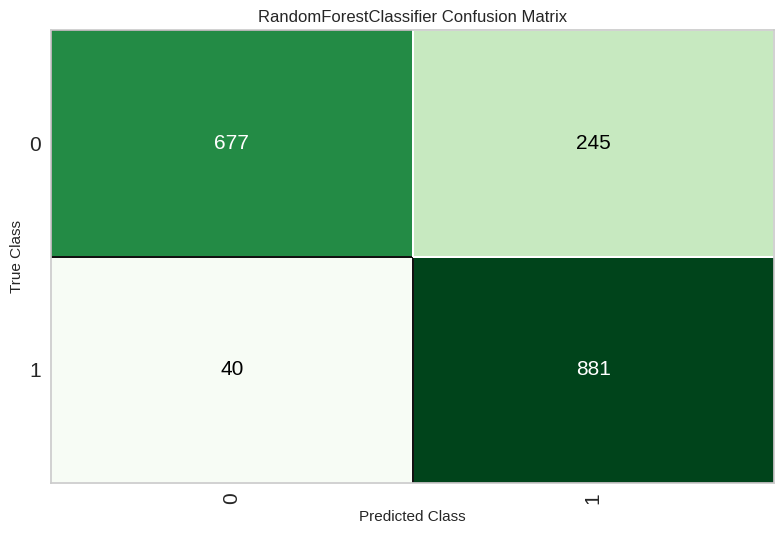

In [116]:
plot_model(bestE, plot="confusion_matrix")

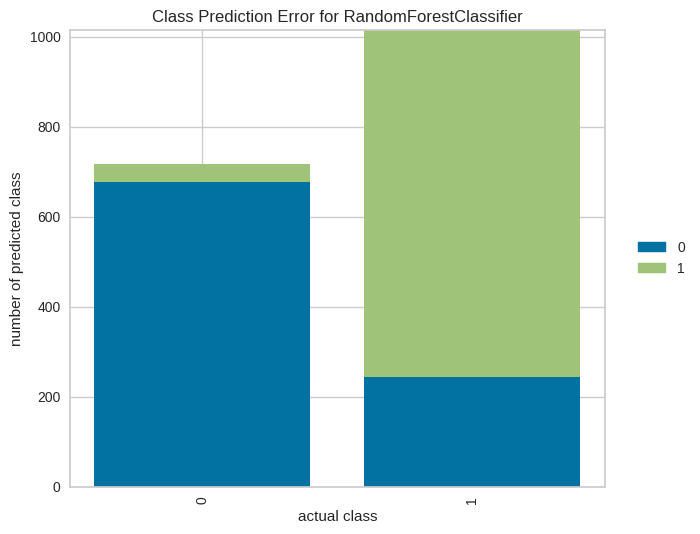

In [117]:
plot_model(bestE, plot="error")

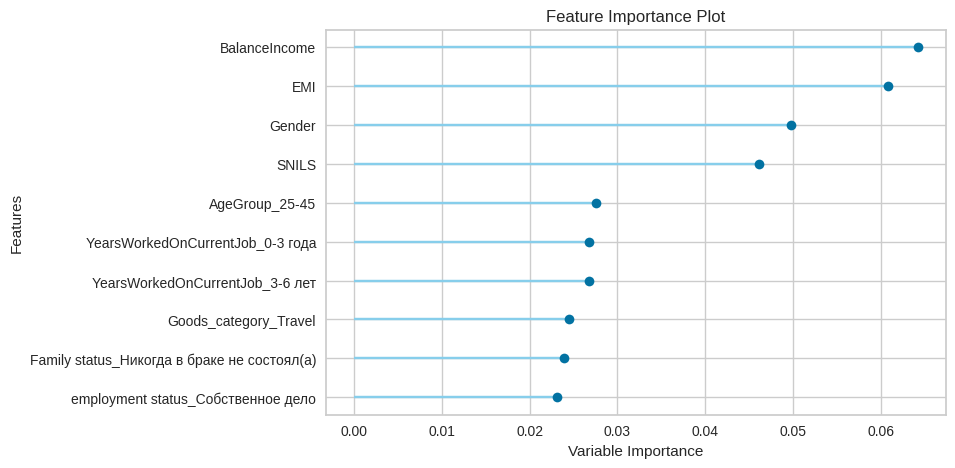

In [118]:
plot_model(bestE, plot='feature')

### Tune hyperparameters

In [120]:
tune_modelE = tune_model(bestE, search_library = 'optuna', optimize=CRITERIA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8512,0.8723,0.9907,0.7745,0.8694,0.7023,0.7314
1,0.8488,0.8616,0.9860,0.7737,0.8671,0.6977,0.7255
2,0.8442,0.8572,0.9907,0.7662,0.8641,0.6884,0.7200
3,0.8791,0.8884,0.9953,0.8075,0.8917,0.7581,0.7795
4,0.8419,0.8689,0.9860,0.7653,0.8618,0.6837,0.7141
5,0.8907,0.9118,0.9860,0.8281,0.9002,0.7814,0.7960
6,0.8512,0.8997,0.9674,0.7849,0.8667,0.7023,0.7221
7,0.8628,0.9018,0.9953,0.7868,0.8789,0.7256,0.7525
8,0.8651,0.9017,0.9907,0.7918,0.8802,0.7302,0.7544


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Save model

In [121]:
final_modelE = finalize_model(tune_modelE)
save_model(final_modelE, 'best_bankE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'ChildCount', 'SNILS',
                                              'ProfRisk', 'SelfEmployed', 'EMI',
                                              'BalanceIncome', 'education_MBA',
                                              'education_Бакалавр',
                                              'education_Высшее - специалист',
                                              'education_Магистр',
                                              'education_Неоконченное высшее',
                                              'education_Неоконченное среднее',
                                              'education_Неск...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         m